## Business Case 1 - Group AC

### 1. Importing packages and data

In [7]:
#standard
import numpy as np
import pandas as pd

#math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import math
import scipy as sc
from scipy import stats
from scipy.spatial import distance

#sklearn normalization/scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer,QuantileTransformer

#sklearn encoders
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors,LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

#sklearn clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram 
from sklearn.metrics import silhouette_score, davies_bouldin_score,silhouette_samples,pairwise_distances


#sklearn prediction/trainings

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score

#PhiK
import phik

#UMAP
import umap

#visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.manifold import TSNE
import graphviz
from tqdm import tqdm

#sompy
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

#Clustering & Visualization Libraries
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, silhouette_visualizer, InterclusterDistance
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

#Clustering Metrics
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score

#ML Prediction
import shap
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

#reporting
import pandas_profiling

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

ImportError: cannot import name 'SOM' from partially initialized module 'sompy' (most likely due to a circular import) (C:\Users\olobo\anaconda3\envs\Main Environment\lib\site-packages\sompy\__init__.py)

In [6]:
!pip install sompy

  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3085 sha256=ad0090622036a6ab228b64304f2c18668b1a7777f3db080027978cb4d1ef6153
  Stored in directory: c:\users\olobo\appdata\local\pip\cache\wheels\97\5a\5d\e09840195e4b8689c3b0d0eae7533367a1552fdce60c202a75
Successfully built sompy


## 2. Business Plan

### 2.1 Business Case

Wonderful Wines of the World (WWW) is a 7-year-old enterprise that seeks out small, unique wineries around the world and brings their wines to its customers. Its mission is to delight its customers with well-made, unique, and interesting wines that would never travel far beyond their points of origin.

WWW sells wines **through catalogs and a web site, and ten small stores** in major cities around the USA. Customers can purchase at the stores, by telephone (after looking at the catalog), or on the web site. Several hundred selections are available in each new catalog, sent every 6 weeks.

Through aggressive promotion in wine and food magazines, WWW now has **350,000 customers in its database**. Most customers are highly involved in wine, entertain frequently, and have sufficient money to indulge their passion for wine. WWW sometimes offers wine accessories as well – wine racks, cork extractors, etc.

WWW is trying to **make use of the database it started about 4 years ago**. So far, it has simply mass-marketed everything. All customers get the catalog, and there are no loyalty programs or attempts to identify target markets for cross-selling opportunities. Now, WWW wants to “get smart” about its database, and start **differentiating customers, and developing more focused programs**.

WWW has provided a sample of 10,000 customers from its **active database**. These are all **customers who have purchased something from WWW in the past 18 months** (after 18 months with no purchase, a person is eliminated from the active database). It was these 20,000 randomly-selected people who were sent the **test promotion for the silver-plated cork extractor**.

### 2.1 Business Objectives

Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to **identify groups of customers that have different product interests, different market participation, or different response to marketing efforts**.

**Market segmentation**, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make **better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing**(marketing mix).

### 2.2 Data Mining approaches & goals

### 2.3 Project Elaboration/Plan

## 3.Data Understanding 

### 3.1 Dataset description

**Customer**'s relative features:
- **Dayswus**: number of days as a customer(numerical)
- **AGE**: customer’s age or imputed age(numerical)
- **EDUC**: years of education(numerical)
- **INCOME**: household income(numerical)
- **KIDHOME**: 1=child under 13 lives at home(binary)
- **TEENHOME** : 1=child 13-19 years lives at home(binary)
- **FREQ** : number of purchases in past 18 mo.(numerical)
- **RECENCY**: number of days since last purchase(numerical)
- **MONETARY**: total sales to this person in 18 mo.(numerical)
- **LTV** : Lifetime value of the customer(numerical)
- **PERDEAL**:% purchases bought on discount
- **WEBPURCH** : % of purchases made on website(numerical)
- **WEBVISIT** : average visits to website per month(numerical)
- **COMPLAIN** : 1=made a complaint in last 18 mo.(binary)
- **MAILFRND** : 1=appears on a purchased list of “mail friendly” customers(binary)
- **EMAILFRD** : 1=appears on a purchased list of “e-mail friendly” customers(binary)

**Wine**'s relative features:
- **DRYRED** : % of wines that were dry red wines(numerical)
- **SWEETRED** : % sweet or semi-dry reds(numerical)
- **DRYWH**: % dry white wines(numerical)
- **SWEETWH**: % sweet or semi-dry white wines(numerical)
- **DESSERT**: % dessert wines (port, sherry, etc.)(numerical)
- **EXOTIC**: % very unusual wines (numerical)

Note: It is important to notice that DRYRED + SWEETRED + DRYWH + SWEETWH + DESSERT = 100%

**Accessory**'s relative features:
- **SMRACK** : 1=bought the small wine rack 50 dollars (binary)
- **LGRACK** : 1=bought the large wine rack 100 dollars(binary)
- **HUMID** : 1=bought wine cellar humidifier 75 dollars (binary)
- **SPCORK** : 1=silver-plated cork extractor 60 dollars (binary)
- **BUCKET**: 1=bought silver wine bucket 150 dollars (binary)
- **ACCESS**: number of accessories (not SPCORK)(numerical)

### 3.2 Collect initial data

In [ ]:
df = pd.read_excel(r'WonderfulWinesoftheWorld.xlsx')

In [ ]:
#excluding last variable since it has no meaning for the project
#del df['Rand']

In [ ]:
df

### 3.3 Data Preparation

#### 3.3.1 Missing Values

In [ ]:
# Check missing values
df.isnull().sum()

In [ ]:
df[df.isnull().any(axis=1)]

After some though process, we conclude that the missing customer id is the **summary of the mean of each column**

In [ ]:
mean_stats = df[df.isnull().any(axis=1)]

df.drop(df.tail(1).index,inplace=True) # drop last row

In [ ]:
#df.set_index('Custid',inplace = True)

In [ ]:
mean_stats

In [ ]:
df.dtypes

In [ ]:
df[['Teenhome','Kidhome']] = df[['Teenhome','Kidhome']].astype(int)

#### 3.3.2 Duplicated data

In [ ]:
# Check duplicated observations
print(len(df.loc[df.duplicated(keep=False), :]))

#### 3.3.3 Inconsistencies

In [ ]:
#Possible customer that doesnt have 18 years old
df.loc[(df['Age'] < 18), :]

In [ ]:
(df["SMRack"] + df["LGRack"] + df["Humid"] + df["Bucket"] == df["Access"]).value_counts()

#### 3.3.3 Feature Engineering

In [ ]:
df["Children"] = df["Teenhome"] + df["Kidhome"]
df["Children"].replace(2,1,inplace=True)

In [ ]:
df["Accessories"] = df["Access"] + df["Spcork"] 

In [ ]:
df.drop(columns="Complain",inplace=True)

In [ ]:
df.dtypes

#### 3.3.4 Outliers Detection

In [ ]:
# Define metric and non-metric features
og_df = df.copy()
df = df.drop(['SMRack','LGRack','Humid','Bucket','Kidhome','Teenhome','Spcork', 'Access'],axis=1)
metric_data = df.select_dtypes(include=['float64'])
metric_features = metric_data.columns.to_list()
non_metric_data = df.select_dtypes(include=['int64'])
non_metric_features = non_metric_data.columns.to_list()

In [ ]:
non_metric_features

#### Pairplot for distribution visualization

In [ ]:
sns.set()

# Setting pairgrid
g = sns.PairGrid(metric_data)

# Populating pairgrid
mdg = g.map_diag(plt.hist, edgecolor="w")
mog = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)


plt.show()

In [ ]:
def gaussian_detective(data):
    fig,axes = plt.subplots(5,4, constrained_layout=False, figsize=(15,12))
    for col,ax in zip(data.columns[0:20], axes.flatten()):
        sm.qqplot(data.loc[:,col], line='q', ax=ax)
        ax.set_title(col)
    for ax in fig.get_axes():
        ax.label_outer()
    plt.show()

In [ ]:
gaussian_detective(metric_data)

#### Conversion to normal dist

In [ ]:
def gaussian_transformer(data):
    not_positive = data.apply(lambda x: np.any(x<=0), axis=0)
    positive = not_positive.index[not_positive==False].to_list() 
    
    # Transformations
    bc = PowerTransformer(method='box-cox') #for positive values
    yj = PowerTransformer(method='yeo-johnson') #for others-->0 and negative
    #qt = QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rng)

    # Perform power transforms and quantile transform
    X_trans_bc = bc.fit_transform(data[positive])
    X_trans_yj = yj.fit_transform(data[data.columns[~data.columns.isin(positive)]])
    #X_trans_qt = qt.fit_transform(data)

    # Merging
    X_trans = np.concatenate((X_trans_bc, X_trans_yj), axis=1)

    # Creating DataFrame
    merge_labels = list(map(lambda x: "bc_" + x, positive))+list(map(lambda x: "yj_" + x, data.columns[~data.columns.isin(positive)]))#+list(map(lambda x: "qt_" + x, data.columns.to_list()))
    trans_df = pd.DataFrame(X_trans, columns=merge_labels, index=data.index)
    return trans_df

In [ ]:
trans_df = gaussian_transformer(metric_data)

In [ ]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(5,4, constrained_layout=False, figsize=(15,12))

fig.suptitle("Normality of various transformations\n", fontsize=25)

for col, ax in zip(trans_df.columns, axes.flatten()):
    x = trans_df.loc[:,col]
    sm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

# Just appear labels on outside axes
for ax in fig.get_axes():
    ax.label_outer()

plt.show()

In [ ]:
trans_df

In [ ]:
gaussian_detective(trans_df)

#### Boxplot for outlier detection

In [ ]:
def boxplotting(dataset,column_id,title):
    sns.set(style="whitegrid")

    # Prepare dataframe layout
    data = dataset.melt(column_id)
    plot_features = dataset.drop(column_id,1).columns
    
    #Prepare figure layout
    fig, axes = plt.subplots(1, len(plot_features), figsize=(15,8), constrained_layout=False)
    
    # Draw the boxplots
    for i in zip(axes, plot_features):
        sns.boxplot(x="variable", y="value", data=data.loc[data["variable"]==i[1]], ax=i[0])
        i[0].set_xlabel("")
        i[0].set_ylabel("")

    # Finalize the plot
    plt.suptitle(title, fontsize=25)
    sns.despine(bottom=True)

    plt.show()

In [ ]:
#normal_df = metric_data.drop('Custid', axis = 1)

In [ ]:
#normal_df_features = normal_df.columns.to_list()

#### Data normalization

In [ ]:
#MinMaxScaler,StandardScaler,RobustScaler

def normalizer(method,data):
    normalized_data = method().fit_transform(data)
    data_scaled = pd.DataFrame(normalized_data, columns = data.columns, index = data.index)
    return data_scaled

In [ ]:
#data_scaled = normalizer(StandardScaler,metric_data)

In [ ]:
#if we want to use transformations


#data_scaled.columns = metric_data.columns
#data_scaled.rename(columns={'bc_Custid': 'Custid'}, inplace = True)

In [ ]:
#data_scaled['Custid'] = metric_data['Custid'].values
#data_scaled

#### outlier detection techniques

In [ ]:
boxplotting(metric_data,'Custid','Boxplot Metric Variables')

Variables that have a reasonable amount of outliers:
- Recency;
- LTV;
- Sweetred
- Drywh;
- Sweetwh;
- Dessert;
- Exotic

In [ ]:
out_df = metric_data[['LTV', 'Recency']]

In [ ]:
out_df

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier

In [ ]:
def outlier_detective(dataset, technique):
    detective = technique
    labels = detective.fit_predict(dataset)
    data = pd.DataFrame()
    data['Outlier'] = labels
    return data['Outlier']

In [ ]:
def outlier_index(variable):
    df_cluster=pd.DataFrame(variable)
    ind_outlier=df_cluster.index[df_cluster['Outlier']==-1]
    return ind_outlier

#### LOF

In [ ]:
lof = outlier_detective(out_df, LocalOutlierFactor(n_neighbors=50, contamination="auto",metric = 'manhattan'))
index_lof = outlier_index(lof)
print(len(index_lof))

#### Isolation Forest

In [ ]:
iso = outlier_detective(out_df, IsolationForest(contamination=0.1))
index_iso = outlier_index(iso)
print(len(index_iso))

#### OneSVM

In [ ]:
one_svm = outlier_detective(out_df,OneClassSVM(gamma='auto'))
index_one_svm = outlier_index(one_svm)
print(len(index_one_svm))

#### Envelop elliptic

In [ ]:
envelop = outlier_detective(out_df,EllipticEnvelope(random_state=0))
index_envelop = outlier_index(envelop)
print(len(index_envelop))

#### Optimization of algo

In [ ]:
#We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. 
#The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains 
#the distance to the closest n_neighbors points and the other which contains the index for each of those points.
#The optimal value for epsilon will be found at the point of maximum curvature.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(out_df)
distances, indices = nbrs.kneighbors(out_df)

#Visualization
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan = outlier_detective(out_df,DBSCAN(0.06,5))
index_dbscan = outlier_index(dbscan)
print(len(index_dbscan))

#### visualization of results

In [ ]:
boxplotting(metric_data.drop(index_lof),'Custid','Boxplot LOF Cleaning')

In [ ]:
boxplotting(metric_data.drop(index_iso),'Custid','Boxplot ISO FOREST Cleaning')

In [ ]:
boxplotting(metric_data.drop(index_envelop),'Custid','Boxplot ENVELOP Cleaning')

In [ ]:
boxplotting(metric_data.drop(index_one_svm),'Custid','Boxplot One_SVM Cleaning')

In [ ]:
boxplotting(metric_data.drop(index_dbscan),'Custid','Boxplot DBSCAN Cleaning')

Afer observations of each boxplot, we can conclude that Isolation Forest should be the algo to deal with outliers that are in this dataset

#### Outliers exploration

In [ ]:
outlier_df = metric_data.iloc[index_iso]
outlier_summary = outlier_df.describe(include='all').transpose()
outlier_summary

In [ ]:
var_summary = metric_data.describe(include='all').transpose()
var_summary

#### Comparing outlier free dataset and outlier dataset

In [ ]:
boxplotting(outlier_df,'Custid','Boxplot Outliers')

In [ ]:
boxplotting(metric_data.drop(index_iso),'Custid','Boxplot ISO FOREST Cleaning')

In [ ]:
#Pairplot of cleaned data 

sns.set()

# Setting pairgrid
g = sns.PairGrid(outlier_df)

# Populating pairgrid
mdg = g.map_diag(plt.hist, edgecolor="w")
mog = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
    
# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=30)


plt.show()

## Feature Selection

In [ ]:
def phik_heatmap(dataset):
    phik = dataset.phik_matrix()

    mask = np.zeros_like(phik, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    f, ax = plt.subplots(figsize=(20, 25)) 
    heatmap = sns.heatmap(phik, 
                          square = True,
                          mask = mask,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .6, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          fmt='.2g',
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 10})
    #add the column names as labels
    ax.set_yticklabels(phik.columns, rotation = 0)
    ax.set_xticklabels(phik.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
phik_heatmap(outlier_df)

In [ ]:
phik_heatmap(df.drop(index_iso))

In [ ]:
corr = metric_data.corr()
print('Monetary:',corr["Monetary"].abs().sum())
print('Freq',corr["Freq"].abs().sum())
print('=-='*7)
print('Income',corr["Income"].abs().sum())
print('Age',corr["Age"].abs().sum())
print('=-='*7)
print('WebVisit',corr["WebVisit"].abs().sum())
print('WebPurchase',corr["WebPurchase"].abs().sum())
print('=-='*7)
print('Drywh',corr["Drywh"].abs().sum())
print('Dryred',corr["Dryred"].abs().sum())
print('=-='*7)
print('Monetary',corr["Monetary"].abs().sum())
print('Income',corr["Income"].abs().sum())

### 3.6 Dimension Reduction

In [ ]:
#data_scaled
metric_data.drop(index_iso)

In [ ]:
clean_df = metric_data.drop(index_iso).set_index('Custid')
clean_df = clean_df.drop(columns = ['Age',
                                    'Dryred',
                                    'WebPurchase',
                                    'Monetary',
                                    'Freq'])

In [ ]:
clean_df

In [ ]:
def pca_components(df1):
    pca = PCA()
    columns=df1.select_dtypes(include='number').columns.tolist()
    pca_feat=pca.fit_transform(df1[columns])
    cov_matrix = df1[columns].cov()
    # Composing back the covariance matrix
    pca_df = pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
                 index=cov_matrix.index, 
                 columns=cov_matrix.columns)
    # Obtaining the projected observations on the principal components axes (linear combinations)
    pca_df_f = pd.DataFrame(df1.values @ pca.components_.T, 
                     index=df1.index,
                     columns=[f"PC{i}" for i in range(pca.n_components_)])
    # Output PCA table
    return pd.DataFrame(
        {"Eigenvalue": pca.explained_variance_,
         "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
         "Proportion": pca.explained_variance_ratio_,
         "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
        index=range(1, pca.n_components_ + 1)
    )
   

In [ ]:
#pca_components(clean_df)

In [ ]:
def pca_clustering(df1, nr_components):
    # Perform PCA again with the number of principal components you want to retain
    pca = PCA(n_components=nr_components)
    pca_feat = pca.fit_transform(df1)
    pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
    pca_df = pd.DataFrame(pca_feat, index=df1.index, columns=pca_feat_names)  # remember index=df_pca.index
   # Reassigning df to contain pca variables
    df_pca = pd.concat([df1, pca_df], axis=1) 
    return df_pca

In [ ]:
#pca_data = pca_clustering(clean_df,1)
#pca_features = pca_data.columns[pca_data.columns.str.startswith('PC')].to_list()
#pca_data

In [ ]:
def pca_check(data,features,nr_features):
    def _color_red_or_green(val):
        if val < -0.45:
            color = 'background-color: red'
        elif val > 0.45:
            color = 'background-color: green'
        else:
            color = ''
        return color

    # Interpreting each Principal Component
    loadings = data.corr().loc[:,features]
    
    return loadings[:-nr_features].style.applymap(_color_red_or_green)

#pca_check(pca_data,pca_features, len(pca_features))

### Complete Dataset

In [ ]:
#non_metric_data[['Accessories','Children','Mailfriend','Emailfriend']].reset_index()

In [ ]:
#pca_data

In [ ]:
clean_non_metric = df[['Custid','Mailfriend','Emailfriend','Children','Accessories']].drop(index_iso).set_index('Custid')
clean_non_metric

In [ ]:
#non_metric_free_out = non_metric_data[['Accessories','Children','Mailfriend','Emailfriend']].drop(index_iso).reset_index(drop=True)
all_data = pd.concat([clean_df,clean_non_metric],axis = 1)

In [ ]:
all_data

## 4. Cluterization

In [ ]:
def plot_cluster_umap(embedding,labels,s,title='Cluster'):
    fig, ax = plt.subplots()
    fig.set_size_inches((20, 10))
    scatter = ax.scatter(embedding[:,0], embedding[:,1], s=s, c=labels, cmap='tab20b', alpha=1.0)
    #produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter.legend_elements(num=max(labels)+1), loc='lower left', title=title)
    ax.add_artist(legend)

In [ ]:
# Performing inertia to validate the previous number of clusters
sse={}
for k in tqdm(range(2, 20)):
    kmeans_i=KMeans(n_clusters=k, max_iter=1000).fit(clean_df)
    sse[k]=kmeans_i.inertia_#inertia: sum of distances of samples to their closest cluster center
# Plot inertia using plotly library
fig=go.Figure(data=go.Scatter(x=list(sse.keys()), y=list(sse.values())))
fig.show()

Observing the inertia plot we decide to use 4 clusters.

### K-Means

In [ ]:
# Get data for clustering
# Standardize input data because we want every one of them to have the same importance
kmeans_data = clean_df.copy()
for i in kmeans_data.select_dtypes(include='number').columns.tolist():
    kmeans_data[i] = PowerTransformer(method='yeo-johnson').fit_transform(np.array(kmeans_data[i]).reshape(-1, 1))

In [ ]:
# K-means for metric features
kmeans=KMeans(n_clusters=4, init='k-means++', max_iter=1000, tol=0.0001).fit(kmeans_data)
kmeans_labels=kmeans.labels_

In [ ]:
# Count of row observations per cluster
kmeans_summary=pd.DataFrame(pd.Series(kmeans_labels).value_counts().sort_index(axis=0),columns=['Observations'])
kmeans_summary.index.name='Cluster'
kmeans_summary

In [ ]:
# Characterizing the final clusters
df_concat=all_data.copy()
df_concat['Cluster'] = kmeans_labels
df_concat.groupby('Cluster').mean().T

In [ ]:
fit1_ = umap.UMAP(metric='l2').fit(kmeans_data)
embedding_kmeans = umap.umap_.simplicial_set_embedding(fit1_._raw_data,fit1_.graph_,fit1_.n_components, 
                                                fit1_._initial_alpha, fit1_._a, fit1_._b, 
                                                fit1_.repulsion_strength, fit1_.negative_sample_rate, 
                                                200, 'random', np.random, fit1_.metric, 
                                                fit1_._metric_kwds, False)

In [ ]:
sns.set_style('white')
plot_cluster_umap(embedding_kmeans,kmeans_labels,3,'Cluster')

In [ ]:
#Dinstantiate the clustering model and visualizer
view=InterclusterDistance(KMeans(4,random_state=4))
#Fit the data to the visualizer
view.fit(embedding_kproto)
#Render the figure
view.show()        
plt.show()

In [ ]:
Km_labeled_data = all_data.reset_index(drop=True)
Km_labeled_data = pd.concat([Km_labeled_data,pd.Series(kmeans_labels, name='labels')], axis=1)
Km_labeled_data

#### Evaluation by Classification using LGBM

In [ ]:
#Set LGBM Dataframe
lgbm_data=kmeans_data.copy()

In [ ]:
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_kp, lgbm_data, kmeans_labels, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_km)}')

In [ ]:
clf_kp.fit(lgbm_data, kmeans_labels)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)

In [ ]:
shap.summary_plot(shap_values_kp, lgbm_data, plot_type='bar', plot_size=(15, 10))

### K-Prototypes

In [ ]:
kproto_data = clean_df.copy()
for i in kproto_data.select_dtypes(include='number').columns.tolist():
    kproto_data[i] = PowerTransformer(method='yeo-johnson').fit_transform(np.array(kproto_data[i]).reshape(-1, 1))

In [ ]:
kproto=KPrototypes(n_clusters=4, init='Cao', n_jobs=4)

In [ ]:
kproto_categorical=[]
for i,j in enumerate(clean_non_metric.columns):
    if j in list(clean_non_metric.columns):
        kproto_categorical.append(i)

In [ ]:
kproto_labels=kproto.fit_predict(kproto_data, categorical=kproto_categorical)

In [344]:
#Count of row observations per cluster
kproto_summary=pd.DataFrame(pd.Series(kproto_labels).value_counts().sort_index(axis=0),columns=['Observations'])
kproto_summary.index.name='Cluster'
kproto_summary

,Observations
Cluster,
0,1974
1,2030
2,2788
3,2208


In [345]:
# Characterizing the final clusters
df_concat=all_data.copy()
df_concat['Cluster'] = kproto_labels
df_concat.groupby('Cluster').mean().T

Cluster,0,1,2,3
Dayswus,901.327338,900.233498,870.698709,915.966486
Edu,15.219074,17.773892,16.816714,17.032609
Income,42422.963501,73371.072414,95000.815638,52679.763134
Recency,51.625640,50.233005,50.161406,51.627717
LTV,18.153466,146.712315,412.424677,4.643116
Perdeal,50.910883,28.101970,6.531923,56.908514
Sweetred,15.324945,1.360099,7.436872,4.302536
Drywh,29.058442,14.645320,32.535868,33.357337
Sweetwh,15.378201,1.374384,7.488522,4.249094
Dessert,15.185650,1.368473,7.101865,4.402627


In [346]:
#Apply UMAP to plot K-Prototypes Clustering

fit1_ = umap.UMAP(metric='l2').fit(kproto_data)
embedding_kproto = umap.umap_.simplicial_set_embedding(fit1_._raw_data,fit1_.graph_,fit1_.n_components, 
                                                fit1_._initial_alpha, fit1_._a, fit1_._b, 
                                                fit1_.repulsion_strength, fit1_.negative_sample_rate, 
                                                200, 'random', np.random, fit1_.metric, 
                                                fit1_._metric_kwds, False)

bytecode dump:
>          0	NOP(arg=None, lineno=79)
           2	LOAD_GLOBAL(arg=0, lineno=79)
           4	LOAD_METHOD(arg=1, lineno=79)
           6	LOAD_FAST(arg=5, lineno=79)
           8	LOAD_ATTR(arg=2, lineno=79)
          10	LOAD_CONST(arg=1, lineno=79)
          12	BINARY_SUBSCR(arg=None, lineno=79)
          14	CALL_METHOD(arg=1, lineno=79)
          16	GET_ITER(arg=None, lineno=79)
>         18	FOR_ITER(arg=468, lineno=79)
          22	STORE_FAST(arg=17, lineno=79)
          24	LOAD_FAST(arg=15, lineno=80)
          26	LOAD_FAST(arg=17, lineno=80)
          28	BINARY_SUBSCR(arg=None, lineno=80)
          30	LOAD_FAST(arg=16, lineno=80)
          32	COMPARE_OP(arg=1, lineno=80)
          34	POP_JUMP_IF_FALSE(arg=18, lineno=80)
          36	LOAD_FAST(arg=2, lineno=81)
          38	LOAD_FAST(arg=17, lineno=81)
          40	BINARY_SUBSCR(arg=None, lineno=81)
          42	STORE_FAST(arg=18, lineno=81)
          44	LOAD_FAST(arg=3, lineno=82)
          46	LOAD_FAST(arg=17, lineno

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=79)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=79)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=79)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=5, lineno=79)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=79)
stack ['$4load_method.1', '$epochs_per_sample6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=79)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=79)
stack ['$4load_method.1', '$8load_attr.3', '$const10.4']
dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=79)
stack ['$4load_method.1', '$12binary_subscr.5']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=79)
stack ['$14call_method.6']
end state. edges=[Edge(pc=18, stack=('$16get_iter.7',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg

stack ['$phi136.0']
dispatch pc=138, inst=STORE_FAST(arg=23, lineno=93)
stack ['$phi136.0', '$const136.1']
end state. edges=[Edge(pc=140, stack=('$phi136.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=140 nstack_initial=1), State(pc_initial=140 nstack_initial=1)])
stack: ['$phi140.0']
dispatch pc=140, inst=LOAD_GLOBAL(arg=5, lineno=95)
stack ['$phi140.0']
dispatch pc=142, inst=LOAD_FAST(arg=10, lineno=95)
stack ['$phi140.0', '$140load_global.1']
dispatch pc=144, inst=CALL_FUNCTION(arg=1, lineno=95)
stack ['$phi140.0', '$140load_global.1', '$dim142.2']
dispatch pc=146, inst=GET_ITER(arg=None, lineno=95)
stack ['$phi140.0', '$144call_function.3']
end state. edges=[Edge(pc=148, stack=('$phi140.0', '$146get_iter.4'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=140 nstack_initial=1), State(pc_initial=148 nstack_initial=2)])
pending: deque([State(pc_initial=148 nstack_initial=2)])
stack: ['$phi148.0', '$phi148.1']
dispatch pc=148, inst=FOR_ITER(arg=74, lineno=9

end state. edges=[Edge(pc=200, stack=('$phi150.0', '$phi150.1'), blockstack=(), npush=0), Edge(pc=148, stack=('$phi150.0', '$phi150.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=276 nstack_initial=2), State(pc_initial=200 nstack_initial=2), State(pc_initial=148 nstack_initial=2)])
stack: ['$phi276.0', '$phi276.1']
dispatch pc=276, inst=FOR_ITER(arg=186, lineno=107)
stack ['$phi276.0', '$phi276.1']
end state. edges=[Edge(pc=464, stack=('$phi276.0',), blockstack=(), npush=0), Edge(pc=278, stack=('$phi276.0', '$phi276.1', '$276for_iter.3'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=200 nstack_initial=2), State(pc_initial=148 nstack_initial=2), State(pc_initial=464 nstack_initial=1), State(pc_initial=278 nstack_initial=3)])
stack: ['$phi200.0', '$phi200.1']
dispatch pc=200, inst=LOAD_FAST(arg=21, lineno=99)
stack ['$phi200.0', '$phi200.1']
dispatch pc=202, inst=LOAD_FAST(arg=24, lineno=99)
stack ['$phi200.0', '$phi200.1', '$other200.2']
dispatch pc=204, ins

stack ['$phi320.0', '$phi320.1', '$324binary_multiply.4']
dispatch pc=328, inst=BINARY_MULTIPLY(arg=None, lineno=115)
stack ['$phi320.0', '$phi320.1', '$324binary_multiply.4', '$b326.5']
dispatch pc=330, inst=STORE_FAST(arg=23, lineno=115)
stack ['$phi320.0', '$phi320.1', '$328binary_multiply.6']
dispatch pc=332, inst=LOAD_FAST(arg=23, lineno=116)
stack ['$phi320.0', '$phi320.1']
dispatch pc=334, inst=LOAD_CONST(arg=6, lineno=116)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7']
dispatch pc=336, inst=LOAD_FAST(arg=22, lineno=116)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$const334.8']
dispatch pc=338, inst=BINARY_ADD(arg=None, lineno=116)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$const334.8', '$dist_squared336.9']
dispatch pc=340, inst=LOAD_FAST(arg=6, lineno=117)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$338binary_add.10']
dispatch pc=342, inst=LOAD_GLOBAL(arg=4, lineno=117)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$338binary_add.

stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$grad_coeff408.4', '$414binary_subscr.7', '$other416.8', '$d418.9']
dispatch pc=422, inst=BINARY_SUBTRACT(arg=None, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$grad_coeff408.4', '$414binary_subscr.7', '$420binary_subscr.10']
dispatch pc=424, inst=BINARY_MULTIPLY(arg=None, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$grad_coeff408.4', '$422binary_subtract.11']
dispatch pc=426, inst=CALL_FUNCTION(arg=1, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$424binary_multiply.12']
dispatch pc=428, inst=STORE_FAST(arg=25, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$426call_function.13']
dispatch pc=430, inst=JUMP_FORWARD(arg=4, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2']
end state. edges=[Edge(pc=436, stack=('$phi406.0', '$phi406.1', '$phi406.2'), blockstack=(), npush=0)]
pending: deque([State(p

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi140.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi148.0': {('$phi148.0',
                            State(pc_initial=148 nstack_initial=2)),
                           ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi148.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1)),
                           ('$phi148.1',
                            State(pc_initial=148 nstack_initial=2))},
             '$phi150.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi150.1': {('$146get_iter.4',
         

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                            State(pc_initial=276 nstack_initial=2))},
             '$phi140.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                            State(pc_initial=276 nstack_initial=2))},
             '$phi148.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                            State(pc_initial=276 nstack_initial=2))},
             '$phi148.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi150.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                 

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi406.0',
                            State(pc_initial=406 nstack_initial=3)),
                           ('$phi432.0',
                            State(pc_initial=432 nstack_initial=3))},
             '$phi140.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi406.0',
                            State(pc_initial=406 nstack_initial=3)),
                           ('$phi432.0',
                            State(pc_initial=432 nstack_initial=3))},
             '$phi148.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi406.0',
                            State(pc_initial=406 nstack_initial=3)),
                           ('$phi432.0',
                          

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi140.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi148.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi148.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi150.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi150.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi150.2': {('$148for_iter.3',
                            State(pc_initial=148 nstack_initial=2))},
             '$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi200.0': {('$16get_iter.7',

block_infos State(pc_initial=36 nstack_initial=1):
AdaptBlockInfo(insts=((36, {'res': '$head36.1'}), (38, {'res': '$i38.2'}), (40, {'index': '$i38.2', 'target': '$head36.1', 'res': '$40binary_subscr.3'}), (42, {'value': '$40binary_subscr.3'}), (44, {'res': '$tail44.4'}), (46, {'res': '$i46.5'}), (48, {'index': '$i46.5', 'target': '$tail44.4', 'res': '$48binary_subscr.6'}), (50, {'value': '$48binary_subscr.6'}), (52, {'res': '$head_embedding52.7'}), (54, {'res': '$j54.8'}), (56, {'index': '$j54.8', 'target': '$head_embedding52.7', 'res': '$56binary_subscr.9'}), (58, {'value': '$56binary_subscr.9'}), (60, {'res': '$tail_embedding60.10'}), (62, {'res': '$k62.11'}), (64, {'index': '$k62.11', 'target': '$tail_embedding60.10', 'res': '$64binary_subscr.12'}), (66, {'value': '$64binary_subscr.12'}), (68, {'res': '$68load_global.13'}), (70, {'res': '$current70.14'}), (72, {'res': '$other72.15'}), (74, {'func': '$68load_global.13', 'args': ['$current70.14', '$other72.15'], 'res': '$74call_functi

block_infos State(pc_initial=276 nstack_initial=2):
AdaptBlockInfo(insts=((276, {'iterator': '$phi276.1', 'pair': '$276for_iter.2', 'indval': '$276for_iter.3', 'pred': '$276for_iter.4'}),), outgoing_phis={'$phi278.2': '$276for_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={464: ('$phi276.0',), 278: ('$phi276.0', '$phi276.1', '$276for_iter.3')})
block_infos State(pc_initial=278 nstack_initial=3):
AdaptBlockInfo(insts=((278, {'value': '$phi278.2'}), (280, {'res': '$280load_global.3'}), (282, {'res': '$rng_state282.4'}), (284, {'func': '$280load_global.3', 'args': ['$rng_state282.4'], 'res': '$284call_function.5'}), (286, {'res': '$n_vertices286.6'}), (288, {'lhs': '$284call_function.5', 'rhs': '$n_vertices286.6', 'res': '$288binary_modulo.7'}), (290, {'value': '$288binary_modulo.7'}), (292, {'res': '$tail_embedding292.8'}), (294, {'res': '$k294.9'}), (296, {'index': '$k294.9', 'target': '$tail_embedding292.8', 'res': '$296binary_subscr.10'}), (298, {'value': '$296bi

block_infos State(pc_initial=490 nstack_initial=0):
AdaptBlockInfo(insts=((490, {'res': '$const490.0'}), (492, {'retval': '$const490.0', 'castval': '$492return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alp

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001807F7A85E0>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\Asus\\anaconda3\\lib\\si

on stmt: epoch_of_next_sample[i] = $238inplace_add.9
on stmt: $244load_global.10 = global(int: <class 'int'>)
on stmt: $252binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $264call_function.20 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: n_neg_samples = $264call_function.20
on stmt: $268load_global.21 = global(range: <class 'range'>)
on stmt: $272call_function.23 = call $268load_global.21(n_neg_samples, func=$268load_global.21, args=[Var(n_neg_samples, layouts.py:103)], kws=(), vararg=None)
on stmt: $274get_iter.24 = getiter(value=$272call_function.23)
on stmt: $phi276.1 = $274get_iter.24
on stmt: jump 276
==== SSA b

==== SSA block analysis pass on 492
Running <numba.core.ssa._GatherDefsHandler object at 0x000001807F7A85E0>
on stmt: jump 148
==== SSA block analysis pass on 493
Running <numba.core.ssa._GatherDefsHandler object at 0x000001807F7A85E0>
on stmt: jump 276
defs defaultdict(<class 'list'>,
            {'$104binary_subtract.10': [<numba.core.ir.Assign object at 0x000001807F791670>],
             '$106call_function.11': [<numba.core.ir.Assign object at 0x000001807F791820>],
             '$108binary_multiply.12': [<numba.core.ir.Assign object at 0x000001807F791970>],
             '$116load_global.15': [<numba.core.ir.Assign object at 0x000001807F791E50>],
             '$122call_function.18': [<numba.core.ir.Assign object at 0x000001807F7AC280>],
             '$124binary_multiply.19': [<numba.core.ir.Assign object at 0x000001807C032220>],
             '$128binary_add.21': [<numba.core.ir.Assign object at 0x000001807F7AC4F0>],
             '$12binary_subscr.5': [<numba.core.ir.Assign object at 

SSA violators {'other', 'd', 'grad_d', 'k', 'dist_squared', 'grad_coeff'}
Fix SSA violator on var other
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7A85E0>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=

on stmt: epoch_of_next_sample[i] = $238inplace_add.9
on stmt: $244load_global.10 = global(int: <class 'int'>)
on stmt: $252binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $264call_function.20 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: n_neg_samples = $264call_function.20
on stmt: $268load_global.21 = global(range: <class 'range'>)
on stmt: $272call_function.23 = call $268load_global.21(n_neg_samples, func=$268load_global.21, args=[Var(n_neg_samples, layouts.py:103)], kws=(), vararg=None)
on stmt: $274get_iter.24 = getiter(value=$272call_function.23)
on stmt: $phi276.1 = $274get_iter.24
on stmt: jump 276
==== SSA b

==== SSA block rewrite pass on 492
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7A85E0>
on stmt: jump 148
==== SSA block rewrite pass on 493
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7A85E0>
on stmt: jump 276
Replaced assignments: defaultdict(<class 'list'>,
            {36: [<numba.core.ir.Assign object at 0x00000180328F7F70>],
             278: [<numba.core.ir.Assign object at 0x000001802EA1C790>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8841F0>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stm

on stmt: $206binary_subscr.6 = getitem(value=other, index=d)
find_def var='other' stmt=$206binary_subscr.6 = getitem(value=other, index=d)
find_def_from_top label 200
idom 150 from label 200
find_def_from_bottom label 150
find_def_from_top label 150
idom 148 from label 150
find_def_from_bottom label 148
find_def_from_top label 148
idom 140 from label 148
find_def_from_bottom label 140
find_def_from_top label 140
idom 36 from label 140
find_def_from_bottom label 36
on stmt: $210unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
on stmt: $214binary_multiply.10 = $210unary_negative.8 * alpha
on stmt: $216inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$206binary_subscr.6, rhs=$214binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: other[d] = $216inplace_add.11
find_def var='other' stmt=other[d] = $216inplace_add.11
find_def_from_top label 200
idom 150 from label 200
find_def_from_bottom label 150
fi

idom 392 from label 394
find_def_from_bottom label 392
find_def_from_top label 392
idom 384 from label 392
find_def_from_bottom label 384
find_def_from_top label 384
idom 278 from label 384
find_def_from_bottom label 278
replaced with: $420binary_subscr.10 = getitem(value=other.1, index=d)
on stmt: $422binary_subtract.11 = $414binary_subscr.7 - $420binary_subscr.10
on stmt: $424binary_multiply.12 = grad_coeff * $422binary_subtract.11
on stmt: $426call_function.13 = call $406load_global.3($424binary_multiply.12, func=$406load_global.3, args=[Var($424binary_multiply.12, layouts.py:126)], kws=(), vararg=None)
on stmt: grad_d = $426call_function.13
on stmt: jump 436
==== SSA block rewrite pass on 432
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8841F0>
on stmt: $const432.3 = const(float, 4.0)
on stmt: grad_d = $const432.3
on stmt: jump 436
==== SSA block rewrite pass on 436
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8841F0>
on stmt: $442binary_subscr.7 = getitem

on stmt: $phi148.1 = $146get_iter.4
on stmt: jump 148
==== SSA block rewrite pass on 148
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884910>
on stmt: $148for_iter.2 = iternext(value=$phi148.1)
on stmt: $148for_iter.3 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: $phi150.2 = $148for_iter.3
on stmt: branch $148for_iter.4, 150, 224
==== SSA block rewrite pass on 150
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884910>
on stmt: d = $phi150.2
first assign: d
replaced with: d = $phi150.2
on stmt: $152load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $160binary_subscr.7 = getitem(value=current, index=d)
on stmt: $166binary_subscr.10 = getitem(value=other, index=d)
on stmt: $168binary_subtract.11 = $160binary_subscr.7 - $166binary_subscr.10
on stmt: $170binary_multiply.12 = grad_coeff * $168binary_subtract.11
on stmt: $172call_function.13 = call $152load_glob

on stmt: bool402 = global(bool: <class 'bool'>)
on stmt: $402pred = call bool402($400compare_op.6, func=bool402, args=(Var($400compare_op.6, layouts.py:125),), kws=(), vararg=None)
on stmt: branch $402pred, 406, 432
==== SSA block rewrite pass on 406
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884910>
on stmt: $406load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $414binary_subscr.7 = getitem(value=current, index=d)
on stmt: $420binary_subscr.10 = getitem(value=other.1, index=d)
on stmt: $422binary_subtract.11 = $414binary_subscr.7 - $420binary_subscr.10
on stmt: $424binary_multiply.12 = grad_coeff * $422binary_subtract.11
on stmt: $426call_function.13 = call $406load_global.3($424binary_multiply.12, func=$406load_global.3, args=[Var($424binary_multiply.12, layouts.py:126)], kws=(), vararg=None)
on stmt: grad_d = $426call_function.13
on stmt: jump 436
==== SSA block rewrite pass on 432
Running <numba.core.ssa._FreshVarHandler

on stmt: grad_coeff = $const136.1
on stmt: jump 140
==== SSA block rewrite pass on 140
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9DE50>
on stmt: $140load_global.1 = global(range: <class 'range'>)
on stmt: $144call_function.3 = call $140load_global.1(dim, func=$140load_global.1, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $146get_iter.4 = getiter(value=$144call_function.3)
on stmt: $phi148.1 = $146get_iter.4
on stmt: jump 148
==== SSA block rewrite pass on 148
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9DE50>
on stmt: $148for_iter.2 = iternext(value=$phi148.1)
on stmt: $148for_iter.3 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: $phi150.2 = $148for_iter.3
on stmt: branch $148for_iter.4, 150, 224
==== SSA block rewrite pass on 150
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9DE50>
on stmt: d = $phi150.2
on stmt: $152load_global.3 = global(clip: CPUDispatcher(<functi

on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $390get_iter.5 = getiter(value=$388call_function.4)
on stmt: $phi392.2 = $390get_iter.5
on stmt: jump 392
==== SSA block rewrite pass on 392
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9DE50>
on stmt: $392for_iter.3 = iternext(value=$phi392.2)
on stmt: $392for_iter.4 = pair_first(value=$392for_iter.3)
on stmt: $392for_iter.5 = pair_second(value=$392for_iter.3)
on stmt: $phi394.3 = $392for_iter.4
on stmt: branch $392for_iter.5, 394, 460
==== SSA block rewrite pass on 394
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9DE50>
on stmt: d.1 = $phi394.3
on stmt: $const398.5 = const(float, 0.0)
on stmt: $400compare_op.6 = grad_coeff > $const398.5
on stmt: bool402 = global(bool: <class 'bool'>)
on stmt: $402pred = call bool402($400compare_op.6, func=bool402, args=(Var($400compare_op.6, layouts.py:125),), kws=(), vararg=None)

on stmt: $const86.1 = const(float, -2.0)
on stmt: $90binary_multiply.3 = $const86.1 * a
on stmt: $94binary_multiply.5 = $90binary_multiply.3 * b
on stmt: $96load_global.6 = global(pow: <built-in function pow>)
on stmt: $const102.9 = const(float, 1.0)
on stmt: $104binary_subtract.10 = b - $const102.9
on stmt: $106call_function.11 = call $96load_global.6(dist_squared, $104binary_subtract.10, func=$96load_global.6, args=[Var(dist_squared, layouts.py:87), Var($104binary_subtract.10, layouts.py:90)], kws=(), vararg=None)
on stmt: $108binary_multiply.12 = $94binary_multiply.5 * $106call_function.11
on stmt: grad_coeff = $108binary_multiply.12
on stmt: $116load_global.15 = global(pow: <built-in function pow>)
on stmt: $122call_function.18 = call $116load_global.15(dist_squared, b, func=$116load_global.15, args=[Var(dist_squared, layouts.py:87), Var(b, layouts.py:79)], kws=(), vararg=None)
on stmt: $124binary_multiply.19 = a * $122call_function.18
on stmt: $const126.20 = const(float, 1.0)
on s

on stmt: grad_coeff = $358inplace_true_divide.20
on stmt: jump 384
==== SSA block rewrite pass on 364
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7B38B0>
on stmt: $368compare_op.4 = j == k
on stmt: bool370 = global(bool: <class 'bool'>)
on stmt: $370pred = call bool370($368compare_op.4, func=bool370, args=(Var($368compare_op.4, layouts.py:119),), kws=(), vararg=None)
on stmt: branch $370pred, 374, 380
==== SSA block rewrite pass on 374
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7B38B0>
on stmt: jump 493
==== SSA block rewrite pass on 380
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7B38B0>
on stmt: $const380.2 = const(float, 0.0)
on stmt: grad_coeff = $const380.2
on stmt: jump 384
==== SSA block rewrite pass on 384
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7B38B0>
on stmt: $384load_global.2 = global(range: <class 'range'>)
on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args

on stmt: dist_squared = $74call_function.16
on stmt: $const80.18 = const(float, 0.0)
on stmt: $82compare_op.19 = dist_squared > $const80.18
on stmt: bool84 = global(bool: <class 'bool'>)
on stmt: $84pred = call bool84($82compare_op.19, func=bool84, args=(Var($82compare_op.19, layouts.py:89),), kws=(), vararg=None)
on stmt: branch $84pred, 86, 136
==== SSA block rewrite pass on 86
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D5B0>
on stmt: $const86.1 = const(float, -2.0)
on stmt: $90binary_multiply.3 = $const86.1 * a
on stmt: $94binary_multiply.5 = $90binary_multiply.3 * b
on stmt: $96load_global.6 = global(pow: <built-in function pow>)
on stmt: $const102.9 = const(float, 1.0)
on stmt: $104binary_subtract.10 = b - $const102.9
on stmt: $106call_function.11 = call $96load_global.6(dist_squared, $104binary_subtract.10, func=$96load_global.6, args=[Var(dist_squared, layouts.py:87), Var($104binary_subtract.10, layouts.py:90)], kws=(), vararg=None)
on stmt: $108binary_multiply.

on stmt: $338binary_add.10 = $const334.8 + dist_squared
on stmt: $342load_global.12 = global(pow: <built-in function pow>)
on stmt: $348call_function.15 = call $342load_global.12(dist_squared, b, func=$342load_global.12, args=[Var(dist_squared, layouts.py:87), Var(b, layouts.py:79)], kws=(), vararg=None)
on stmt: $350binary_multiply.16 = a * $348call_function.15
on stmt: $const352.17 = const(int, 1)
on stmt: $354binary_add.18 = $350binary_multiply.16 + $const352.17
on stmt: $356binary_multiply.19 = $338binary_add.10 * $354binary_add.18
on stmt: $358inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$356binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff = $358inplace_true_divide.20
on stmt: jump 384
==== SSA block rewrite pass on 364
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D5B0>
on stmt: $368compare_op.4 = j == k
on stmt: bool370 = global(bool: <class '

Running <numba.core.ssa._FreshVarHandler object at 0x000001807FB9D280>
on stmt: $40binary_subscr.3 = getitem(value=head, index=i)
on stmt: j = $40binary_subscr.3
on stmt: $48binary_subscr.6 = getitem(value=tail, index=i)
on stmt: k = $48binary_subscr.6
first assign: k
replaced with: k = $48binary_subscr.6
on stmt: $56binary_subscr.9 = getitem(value=head_embedding, index=j)
on stmt: current = $56binary_subscr.9
on stmt: $64binary_subscr.12 = getitem(value=tail_embedding, index=k)
on stmt: other = $64binary_subscr.12
on stmt: $68load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x00000180614853A0>))
on stmt: $74call_function.16 = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:84), Var(other, layouts.py:85)], kws=(), vararg=None)
on stmt: dist_squared = $74call_function.16
on stmt: $const80.18 = const(float, 0.0)
on stmt: $82compare_op.19 = dist_squared > $const80.18
on stmt: bool84 = global(bool: <class 'bool'>)
on stmt: $84pred

on stmt: $314compare_op.17 = dist_squared > $const312.16
on stmt: bool316 = global(bool: <class 'bool'>)
on stmt: $316pred = call bool316($314compare_op.17, func=bool316, args=(Var($314compare_op.17, layouts.py:114),), kws=(), vararg=None)
on stmt: branch $316pred, 320, 364
==== SSA block rewrite pass on 320
Running <numba.core.ssa._FreshVarHandler object at 0x000001807FB9D280>
on stmt: $const320.2 = const(float, 2.0)
on stmt: $324binary_multiply.4 = $const320.2 * gamma
on stmt: $328binary_multiply.6 = $324binary_multiply.4 * b
on stmt: grad_coeff = $328binary_multiply.6
on stmt: $const334.8 = const(float, 0.001)
on stmt: $338binary_add.10 = $const334.8 + dist_squared
on stmt: $342load_global.12 = global(pow: <built-in function pow>)
on stmt: $348call_function.15 = call $342load_global.12(dist_squared, b, func=$342load_global.12, args=[Var(dist_squared, layouts.py:87), Var(b, layouts.py:79)], kws=(), vararg=None)
on stmt: $350binary_multiply.16 = a * $348call_function.15
on stmt: $cons

on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 490
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8843A0>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i)
on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: bool34 = global(bool: <class 'bool'>)
on stmt: $34pred = call bool34($32compare_op.6, func=bool34, args=(Var($32compare_op.6, layouts.py:80),), kws=(), vararg=None)
on stmt: branch $34pred, 36, 491
==== SSA block rewrite pass on 36
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8843A0>
on stmt: $40binary_subscr.3 = getitem(value=head, index=i)
on stmt: j = $40binary_subscr.3
on stmt: $48binary_subscr.6 = getitem(value=tail, index=i)
on stmt: k = $48binary_subscr.6
on stmt: $56binary_subscr.9 = getitem(value=head_embedding, index=j)
on stmt: current = $56binary_subscr.9
on stmt: $64binary_subscr

on stmt: $288binary_modulo.7 = $284call_function.5 % n_vertices
on stmt: k.1 = $288binary_modulo.7
on stmt: $296binary_subscr.10 = getitem(value=tail_embedding, index=k)
find_def var='k' stmt=$296binary_subscr.10 = getitem(value=tail_embedding, index=k)
replaced with: $296binary_subscr.10 = getitem(value=tail_embedding, index=k.1)
on stmt: other.1 = $296binary_subscr.10
on stmt: $300load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x00000180614853A0>))
on stmt: $306call_function.14 = call $300load_global.11(current, other.1, func=$300load_global.11, args=[Var(current, layouts.py:84), Var(other.1, layouts.py:110)], kws=(), vararg=None)
on stmt: dist_squared = $306call_function.14
on stmt: $const312.16 = const(float, 0.0)
on stmt: $314compare_op.17 = dist_squared > $const312.16
on stmt: bool316 = global(bool: <class 'bool'>)
on stmt: $316pred = call bool316($314compare_op.17, func=bool316, args=(Var($314compare_op.17, layouts.py:114),), kws=(), vararg=None)
on stmt: branch

on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:79)], kws=(), vararg=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A3E23A0>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 490
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A3E23A0>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sa

Running <numba.core.ssa._FreshVarHandler object at 0x000001807A3E23A0>
on stmt: $276for_iter.2 = iternext(value=$phi276.1)
on stmt: $276for_iter.3 = pair_first(value=$276for_iter.2)
on stmt: $276for_iter.4 = pair_second(value=$276for_iter.2)
on stmt: $phi278.2 = $276for_iter.3
on stmt: branch $276for_iter.4, 278, 464
==== SSA block rewrite pass on 278
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A3E23A0>
on stmt: p = $phi278.2
on stmt: $280load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x0000018060F0C790>))
on stmt: $284call_function.5 = call $280load_global.3(rng_state, func=$280load_global.3, args=[Var(rng_state, layouts.py:79)], kws=(), vararg=None)
on stmt: $288binary_modulo.7 = $284call_function.5 % n_vertices
on stmt: k.1 = $288binary_modulo.7
on stmt: $296binary_subscr.10 = getitem(value=tail_embedding, index=k.1)
on stmt: other.1 = $296binary_subscr.10
on stmt: $300load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0

on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:79)]

on stmt: $238inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$230binary_subscr.5, rhs=$236binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_sample[i] = $238inplace_add.9
on stmt: $244load_global.10 = global(int: <class 'int'>)
on stmt: $252binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $264call_function.20 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: n_neg_samples = $264call_function.20
on stmt: $268load_global.21 = global(range: <class 'range'>)
on stmt: $272call_function.23 = call $268load_global.21(n_neg_samples, func=$268load

==== SSA block rewrite pass on 460
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D340>
on stmt: jump 493
==== SSA block rewrite pass on 464
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D340>
on stmt: $470binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $478binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $480binary_multiply.10 = n_neg_samples * $478binary_subscr.9
on stmt: $482inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$470binary_subscr.5, rhs=$480binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_negative_sample[i] = $482inplace_add.11
on stmt: jump 491
==== SSA block rewrite pass on 490
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D340>
on stmt: $const490.0 = const(NoneType, None)
on stmt: $492return_value.1 = cast(value=$const490.0)
on stmt: return $492return_value.1
==== SSA block rewr

on stmt: $188binary_multiply.21 = grad_d * alpha
on stmt: $190inplace_add.22 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$182binary_subscr.18, rhs=$188binary_multiply.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $190inplace_add.22
on stmt: bool198 = global(bool: <class 'bool'>)
on stmt: $198pred = call bool198(move_other, func=bool198, args=(Var(move_other, layouts.py:79),), kws=(), vararg=None)
on stmt: branch $198pred, 200, 492
==== SSA block rewrite pass on 200
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884DF0>
on stmt: $206binary_subscr.6 = getitem(value=other, index=d)
on stmt: $210unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
on stmt: $214binary_multiply.10 = $210unary_negative.8 * alpha
on stmt: $216inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$206binary_subscr.6, rhs=$214binary_multiply.10, static_lhs=Undefined, st

on stmt: grad_d.2 = $const432.3
on stmt: jump 436
==== SSA block rewrite pass on 436
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884DF0>
on stmt: grad_d.3 = phi(incoming_values=[Var(grad_d.2, layouts.py:128), Var(grad_d.1, layouts.py:126)], incoming_blocks=[432, 406])
on stmt: $442binary_subscr.7 = getitem(value=current, index=d.1)
on stmt: $448binary_multiply.10 = grad_d.3 * alpha
on stmt: $450inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$442binary_subscr.7, rhs=$448binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d.1] = $450inplace_add.11
on stmt: jump 392
==== SSA block rewrite pass on 460
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884DF0>
on stmt: jump 493
==== SSA block rewrite pass on 464
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A884DF0>
on stmt: $470binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $47

on stmt: $phi148.1 = $146get_iter.4
on stmt: jump 148
==== SSA block rewrite pass on 148
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D190>
on stmt: $148for_iter.2 = iternext(value=$phi148.1)
on stmt: $148for_iter.3 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: $phi150.2 = $148for_iter.3
on stmt: branch $148for_iter.4, 150, 224
==== SSA block rewrite pass on 150
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D190>
on stmt: d = $phi150.2
on stmt: $152load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $160binary_subscr.7 = getitem(value=current, index=d)
on stmt: $166binary_subscr.10 = getitem(value=other, index=d)
on stmt: $168binary_subtract.11 = $160binary_subscr.7 - $166binary_subscr.10
on stmt: $170binary_multiply.12 = grad_coeff * $168binary_subtract.11
find_def var='grad_coeff' stmt=$170binary_multiply.12 = grad_coeff * $168binary_subtract.11
find_def_from

Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D190>
on stmt: $384load_global.2 = global(range: <class 'range'>)
on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $390get_iter.5 = getiter(value=$388call_function.4)
on stmt: $phi392.2 = $390get_iter.5
on stmt: jump 392
==== SSA block rewrite pass on 392
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D190>
on stmt: $392for_iter.3 = iternext(value=$phi392.2)
on stmt: $392for_iter.4 = pair_first(value=$392for_iter.3)
on stmt: $392for_iter.5 = pair_second(value=$392for_iter.3)
on stmt: $phi394.3 = $392for_iter.4
on stmt: branch $392for_iter.5, 394, 460
==== SSA block rewrite pass on 394
Running <numba.core.ssa._FixSSAVars object at 0x000001807FB9D190>
on stmt: d.1 = $phi394.3
on stmt: $const398.5 = const(float, 0.0)
on stmt: $400compare_op.6 = grad_coeff > $const398.5
find_def var='grad_coeff' stmt=$400compare_op.6 = grad

stack ['$const40.0']
end state. edges=[]
pending: deque([State(pc_initial=32 nstack_initial=2)])
stack: ['$phi32.0', '$phi32.1']
dispatch pc=32, inst=STORE_FAST(arg=18, lineno=2)
stack ['$phi32.0', '$phi32.1']
dispatch pc=34, inst=LOAD_CONST(arg=1, lineno=3)
stack ['$phi32.0']
dispatch pc=36, inst=STORE_FAST(arg=19, lineno=3)
stack ['$phi32.0', '$const34.2']
dispatch pc=38, inst=JUMP_ABSOLUTE(arg=30, lineno=3)
stack ['$phi32.0']
end state. edges=[Edge(pc=30, stack=('$phi32.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=30 nstack_initial=1)])
-------------------------Prune PHIs-------------------------
Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=30 nstack_initial=1): {'$phi30.0'},
             State(pc_initial=32 nstack_initial=2): {'$phi32.1'},
             State(pc_initial=40 nstack_initial=0): set()})
defmap: {'$phi30.0': State(pc_initial=0 nstack_initial=0),
 '$phi32.1': State(pc_initi

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x00000180221FEE80>
on stmt: sched.3225 = arg(0, name=sched)
on stmt: a = arg(1, name=a)
on stmt: alpha = arg(2, name=alpha)
on stmt: b = arg(3, name=b)
on stmt: dim = arg(4, name=dim)
on stmt: epochs__per__negative__sample = arg(5, name=epochs__per__negative__sample)
on stmt: epochs__per__sample = arg(6, name=epochs__per__sample)
on stmt: gamma = arg(7, name=gamma)
on stmt: head = arg(8, name=head)
on stmt: head__embedding = arg(9, name=head__embedding)
on stmt: move__other = arg(10, name=move__other)
on stmt: n = arg(11, name=n)
on stmt: n__vertices = arg(12, name=n__vertices)
on stmt: rng__state = arg(13, name=rng__state)
on stmt: tail = arg(14, name=tail)
on stmt: tail__embedding = arg(15, name=tail__embedding)
on stmt: epoch__of__next__negative__sample = arg(16, name=epoch__of__next__negative__sample)
on stmt: epoch__of__next__sample = arg(17, name=epoch__of__next__sample)
on stmt: $2load_global

on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: $34pred = call bool34($32compare_op.6, func=bool34, args=(Var($32compare_op.6, layouts.py:80),), kws=(), vararg=None)
on stmt: branch $34pred, 63, 532
==== SSA block analysis pass on 317
Running <numba.core.ssa._GatherDefsHandler object at 0x00000180221FEE80>
on stmt: $276for_iter.2 = iternext(value=$274get_iter.24)
on stmt: $p.3128 = pair_first(value=$276for_iter.2)
on stmt: $276for_iter.4 = pair_second(value=$276for_iter.2)
on stmt: branch $276for_iter.4, 319, 531
==== SSA block analysis pass on 189
Running <numba.core.ssa._GatherDefsHandler object at 0x00000180221FEE80>
on stmt: $160binary_subscr.7 = getitem(value=$current.3118, index=$d.3122)
on stmt: $166binary_subscr.10 = getitem(value=$other.3110, index=$d.3122)
on stmt: $168binary_subtract.11 = $160binary_subscr.7 - $166binary_subscr.10
on stmt: $170binary_multiply.12 = grad_coeff.6 * $168binary_subtract.11
on stmt: $grad_d.3123 = call $152load_global.3($170binary_mult

on stmt: $356binary_multiply.19 = $338binary_add.10 * $354binary_add.18
on stmt: $grad_coeff.7.3220 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=$grad_coeff.3.3132, rhs=$356binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff.7 = $grad_coeff.7.3220
on stmt: jump 425
==== SSA block analysis pass on 405
Running <numba.core.ssa._GatherDefsHandler object at 0x00000180221FEE80>
on stmt: $368compare_op.4 = $j.3113 == $k.1.3114
on stmt: $370pred = call bool370($368compare_op.4, func=bool370, args=(Var($368compare_op.4, layouts.py:119),), kws=(), vararg=None)
on stmt: branch $370pred, 415, 421
==== SSA block analysis pass on 415
Running <numba.core.ssa._GatherDefsHandler object at 0x00000180221FEE80>
on stmt: jump 505
==== SSA block analysis pass on 533
Running <numba.core.ssa._GatherDefsHandler object at 0x00000180221FEE80>
on stmt: jump 30
defs defaultdict(<class 'list'>,
            {'$104binary_subtract.10': [

SSA violators {'grad_coeff.7', 'grad_coeff.6', 'grad_d.3'}
Fix SSA violator on var grad_coeff.7
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001803294FD30>
on stmt: sched.3225 = arg(0, name=sched)
on stmt: a = arg(1, name=a)
on stmt: alpha = arg(2, name=alpha)
on stmt: b = arg(3, name=b)
on stmt: dim = arg(4, name=dim)
on stmt: epochs__per__negative__sample = arg(5, name=epochs__per__negative__sample)
on stmt: epochs__per__sample = arg(6, name=epochs__per__sample)
on stmt: gamma = arg(7, name=gamma)
on stmt: head = arg(8, name=head)
on stmt: head__embedding = arg(9, name=head__embedding)
on stmt: move__other = arg(10, name=move__other)
on stmt: n = arg(11, name=n)
on stmt: n__vertices = arg(12, name=n__vertices)
on stmt: rng__state = arg(13, name=rng__state)
on stmt: tail = arg(14, name=tail)
on stmt: tail__embedding = arg(15, name=tail__embedding)
on stmt: epoch__of__next__negative__sample = arg(16, name=epoch__of__next__negative__sample)
on

Running <numba.core.ssa._FreshVarHandler object at 0x000001803294FD30>
on stmt: $28binary_subscr.4 = getitem(value=epoch__of__next__sample, index=parfor__index_3107)
on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: $34pred = call bool34($32compare_op.6, func=bool34, args=(Var($32compare_op.6, layouts.py:80),), kws=(), vararg=None)
on stmt: branch $34pred, 63, 532
==== SSA block rewrite pass on 317
Running <numba.core.ssa._FreshVarHandler object at 0x000001803294FD30>
on stmt: $276for_iter.2 = iternext(value=$274get_iter.24)
on stmt: $p.3128 = pair_first(value=$276for_iter.2)
on stmt: $276for_iter.4 = pair_second(value=$276for_iter.2)
on stmt: branch $276for_iter.4, 319, 531
==== SSA block rewrite pass on 189
Running <numba.core.ssa._FreshVarHandler object at 0x000001803294FD30>
on stmt: $160binary_subscr.7 = getitem(value=$current.3118, index=$d.3122)
on stmt: $166binary_subscr.10 = getitem(value=$other.3110, index=$d.3122)
on stmt: $168binary_subtract.11 = $160binary_subscr

on stmt: $350binary_multiply.16 = a * $348call_function.15
on stmt: $354binary_add.18 = $350binary_multiply.16 + $const352.17
on stmt: $356binary_multiply.19 = $338binary_add.10 * $354binary_add.18
on stmt: $grad_coeff.7.3220 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=$grad_coeff.3.3132, rhs=$356binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff.7 = $grad_coeff.7.3220
replaced with: grad_coeff.7 = $grad_coeff.7.3220
on stmt: jump 425
==== SSA block rewrite pass on 405
Running <numba.core.ssa._FreshVarHandler object at 0x000001803294FD30>
on stmt: $368compare_op.4 = $j.3113 == $k.1.3114
on stmt: $370pred = call bool370($368compare_op.4, func=bool370, args=(Var($368compare_op.4, layouts.py:119),), kws=(), vararg=None)
on stmt: branch $370pred, 415, 421
==== SSA block rewrite pass on 415
Running <numba.core.ssa._FreshVarHandler object at 0x000001803294FD30>
on stmt: jump 505
==== SSA block rewrite pass on

on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs__per__negative__sample, index=parfor__index_3107)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $n_neg_samples.3111 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: $272call_function.23 = call $268load_global.21($n_neg_samples.3111, func=$268load_global.21, args=[Var($n_neg_samples.3111, layouts.py:103)], kws=(), vararg=None)
on stmt: $274get_iter.24 = getiter(value=$272call_function.23)
on stmt: jump 317
==== SSA block rewrite pass on 181
Running <numba.core.ssa._FixSSAVars object at 0x0000018020F3D4C0>
on stmt: $148for_iter.2 = iternext(value=$146get_iter.4)
on stmt: $d.3122 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: branch $148for_iter.4, 189, 265
==== SSA

on stmt: $124binary_multiply.19 = a * $122call_function.18
on stmt: $128binary_add.21 = $124binary_multiply.19 + $const126.20
on stmt: $grad_coeff.6.3219 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=$grad_coeff.3130, rhs=$128binary_add.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff.6 = $grad_coeff.6.3219
on stmt: jump 177
==== SSA block rewrite pass on 241
Running <numba.core.ssa._FixSSAVars object at 0x0000018020F3D4C0>
on stmt: jump 181
==== SSA block rewrite pass on 505
Running <numba.core.ssa._FixSSAVars object at 0x0000018020F3D4C0>
on stmt: jump 317
==== SSA block rewrite pass on 531
Running <numba.core.ssa._FixSSAVars object at 0x0000018020F3D4C0>
on stmt: $470binary_subscr.5 = getitem(value=epoch__of__next__negative__sample, index=parfor__index_3107)
on stmt: $478binary_subscr.9 = getitem(value=epochs__per__negative__sample, index=parfor__index_3107)
on stmt: $480binary_multiply.10 = $n_neg_samples.3111 * $4

first assign: grad_coeff.6
replaced with: grad_coeff.6 = $grad_coeff.6.3216
on stmt: jump 177
==== SSA block rewrite pass on 425
Running <numba.core.ssa._FreshVarHandler object at 0x0000018023EE4F70>
on stmt: grad_coeff.7.1 = phi(incoming_values=[Var(grad_coeff.7, layouts.py:124), Var(grad_coeff.7, layouts.py:124)], incoming_blocks=[361, 421])
on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $390get_iter.5 = getiter(value=$388call_function.4)
on stmt: jump 433
==== SSA block rewrite pass on 433
Running <numba.core.ssa._FreshVarHandler object at 0x0000018023EE4F70>
on stmt: $392for_iter.3 = iternext(value=$390get_iter.5)
on stmt: $d.1.3124 = pair_first(value=$392for_iter.3)
on stmt: $392for_iter.5 = pair_second(value=$392for_iter.3)
on stmt: branch $392for_iter.5, 435, 501
==== SSA block rewrite pass on 177
Running <numba.core.ssa._FreshVarHandler object at 0x0000018023EE4F70>
on stmt: $144ca

on stmt: $448binary_multiply.10 = grad_d.3 * alpha
on stmt: $450inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$442binary_subscr.7, rhs=$448binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: $current.3118[$d.1.3124] = $450inplace_add.11
on stmt: jump 433
==== SSA block rewrite pass on 501
Running <numba.core.ssa._FreshVarHandler object at 0x0000018023EE4F70>
on stmt: jump 505
==== SSA block rewrite pass on 77
Running <numba.core.ssa._FreshVarHandler object at 0x0000018023EE4F70>
on stmt: $106call_function.11 = call $96load_global.6($dist_squared.3116, $104binary_subtract.10, func=$96load_global.6, args=[Var($dist_squared.3116, layouts.py:87), Var($104binary_subtract.10, layouts.py:90)], kws=(), vararg=None)
on stmt: $grad_coeff.3130 = $94binary_multiply.5 * $106call_function.11
on stmt: $122call_function.18 = call $116load_global.15($dist_squared.3116, b, func=$116load_global.15, args=[Var($dist_squared.3116, 

on stmt: $const352.17 = const(int, 1)
on stmt: bool370 = global(bool: <class 'bool'>)
on stmt: jump 30
==== SSA block rewrite pass on 30
Running <numba.core.ssa._FixSSAVars object at 0x000001801DEAEF10>
on stmt: $30for_iter.1.3239 = iternext(value=$phi30.0.3238)
on stmt: $30for_iter.2.3240 = pair_first(value=$30for_iter.1.3239)
on stmt: $30for_iter.3.3241 = pair_second(value=$30for_iter.1.3239)
on stmt: $phi32.1.3242 = $30for_iter.2.3240
on stmt: branch $30for_iter.3.3241, 32, 534
==== SSA block rewrite pass on 32
Running <numba.core.ssa._FixSSAVars object at 0x000001801DEAEF10>
on stmt: parfor__index_3107 = $phi32.1.3242
on stmt: $const34.2.3243 = const(int, 0)
on stmt: jump 40
==== SSA block rewrite pass on 534
Running <numba.core.ssa._FixSSAVars object at 0x000001801DEAEF10>
on stmt: $const40.0.3244 = const(NoneType, None)
on stmt: $42return_value.1.3245 = cast(value=$const40.0.3244)
on stmt: return $42return_value.1.3245
==== SSA block rewrite pass on 421
Running <numba.core.ssa._F

on stmt: jump 477
==== SSA block rewrite pass on 473
Running <numba.core.ssa._FixSSAVars object at 0x000001801DEAEF10>
on stmt: grad_d.3 = $grad_d.3.3218
on stmt: jump 477
==== SSA block rewrite pass on 319
Running <numba.core.ssa._FixSSAVars object at 0x000001801DEAEF10>
on stmt: $284call_function.5 = call $280load_global.3(rng__state, func=$280load_global.3, args=[Var(rng__state, layouts.py:79)], kws=(), vararg=None)
on stmt: $k.1.3114 = $284call_function.5 % n__vertices
on stmt: $other.1.3115 = getitem(value=tail__embedding, index=$k.1.3114)
on stmt: $dist_squared.1.3117 = call $300load_global.11($current.3118, $other.1.3115, func=$300load_global.11, args=[Var($current.3118, layouts.py:84), Var($other.1.3115, layouts.py:110)], kws=(), vararg=None)
on stmt: $314compare_op.17 = $dist_squared.1.3117 > $const312.16
on stmt: $316pred = call bool316($314compare_op.17, func=bool316, args=(Var($314compare_op.17, layouts.py:114),), kws=(), vararg=None)
on stmt: branch $316pred, 361, 405
====

on stmt: $152load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: bool198 = global(bool: <class 'bool'>)
on stmt: $const398.5 = const(float, 0.0)
on stmt: bool402 = global(bool: <class 'bool'>)
on stmt: $68load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x00000180614853A0>))
on stmt: $const80.18 = const(float, 0.0)
on stmt: bool84 = global(bool: <class 'bool'>)
on stmt: $406load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $grad_d.3.3218 = const(float, 4.0)
on stmt: $280load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x0000018060F0C790>))
on stmt: $300load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x00000180614853A0>))
on stmt: $const312.16 = const(float, 0.0)
on stmt: bool316 = global(bool: <class 'bool'>)
on stmt: $const86.1 = const(float, -2.0)
on stmt: $90binary_multiply.3 = $const86.1 * a
on stmt: $94binary_multiply.5 = $90binary_multiply.3

on stmt: $other.3110 = getitem(value=tail__embedding, index=$k.3112)
on stmt: $dist_squared.3116 = call $68load_global.13($current.3118, $other.3110, func=$68load_global.13, args=[Var($current.3118, layouts.py:84), Var($other.3110, layouts.py:85)], kws=(), vararg=None)
on stmt: $82compare_op.19 = $dist_squared.3116 > $const80.18
on stmt: $84pred = call bool84($82compare_op.19, func=bool84, args=(Var($82compare_op.19, layouts.py:89),), kws=(), vararg=None)
on stmt: branch $84pred, 77, 127
==== SSA block rewrite pass on 447
Running <numba.core.ssa._FreshVarHandler object at 0x0000018020F3DEE0>
on stmt: $414binary_subscr.7 = getitem(value=$current.3118, index=$d.1.3124)
on stmt: $420binary_subscr.10 = getitem(value=$other.1.3115, index=$d.1.3124)
on stmt: $422binary_subtract.11 = $414binary_subscr.7 - $420binary_subscr.10
on stmt: $424binary_multiply.12 = grad_coeff.7.1 * $422binary_subtract.11
on stmt: $grad_d.3.3217 = call $406load_global.3($424binary_multiply.12, func=$406load_global.3

on stmt: $8binary_subscr.3.3228 = getitem(value=sched.3225, index=$const6.2.3227)
on stmt: $const12.5.3229 = const(int, 1)
on stmt: $14binary_subscr.6.3230 = getitem(value=sched.3225, index=$const12.5.3229)
on stmt: $16load_global.7.3231 = global(np: <module 'numpy' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
on stmt: $18load_method.8.3232 = getattr(value=$16load_global.7.3231, attr=uint8)
on stmt: $const20.9.3233 = const(int, 1)
on stmt: $22call_method.10.3234 = call $18load_method.8.3232($const20.9.3233, func=$18load_method.8.3232, args=[Var($const20.9.3233, <string>:2)], kws=(), vararg=None)
on stmt: $24binary_add.11.3235 = $14binary_subscr.6.3230 + $22call_method.10.3234
on stmt: $26call_function.12.3236 = call $2load_global.0.3226($8binary_subscr.3.3228, $24binary_add.11.3235, func=$2load_global.0.3226, args=[Var($8binary_subscr.3.3228, <string>:2), Var($24binary_add.11.3235, <string>:2)], kws=(), vararg=None)
on stmt: $28get_iter.13.3237 = getiter(

on stmt: $170binary_multiply.12 = grad_coeff.6.1 * $168binary_subtract.11
on stmt: $grad_d.3123 = call $152load_global.3($170binary_multiply.12, func=$152load_global.3, args=[Var($170binary_multiply.12, layouts.py:96)], kws=(), vararg=None)
on stmt: $182binary_subscr.18 = getitem(value=$current.3118, index=$d.3122)
on stmt: $188binary_multiply.21 = $grad_d.3123 * alpha
on stmt: $190inplace_add.22 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$182binary_subscr.18, rhs=$188binary_multiply.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: $current.3118[$d.3122] = $190inplace_add.22
on stmt: $198pred = call bool198(move__other, func=bool198, args=(Var(move__other, layouts.py:79),), kws=(), vararg=None)
on stmt: branch $198pred, 191, 241
==== SSA block rewrite pass on 435
Running <numba.core.ssa._FixSSAVars object at 0x0000018019E0EB50>
on stmt: $400compare_op.6 = grad_coeff.7.1 > $const398.5
on stmt: $402pred = call bool402($400compare_op.6, 

on stmt: branch $370pred, 415, 421
==== SSA block rewrite pass on 415
Running <numba.core.ssa._FixSSAVars object at 0x0000018019E0EB50>
on stmt: jump 505
==== SSA block rewrite pass on 533
Running <numba.core.ssa._FixSSAVars object at 0x0000018019E0EB50>
on stmt: jump 30
bytecode dump:
>          0	NOP(arg=None, lineno=79)
           2	LOAD_GLOBAL(arg=0, lineno=79)
           4	LOAD_METHOD(arg=1, lineno=79)
           6	LOAD_FAST(arg=5, lineno=79)
           8	LOAD_ATTR(arg=2, lineno=79)
          10	LOAD_CONST(arg=1, lineno=79)
          12	BINARY_SUBSCR(arg=None, lineno=79)
          14	CALL_METHOD(arg=1, lineno=79)
          16	GET_ITER(arg=None, lineno=79)
>         18	FOR_ITER(arg=468, lineno=79)
          22	STORE_FAST(arg=17, lineno=79)
          24	LOAD_FAST(arg=15, lineno=80)
          26	LOAD_FAST(arg=17, lineno=80)
          28	BINARY_SUBSCR(arg=None, lineno=80)
          30	LOAD_FAST(arg=16, lineno=80)
          32	COMPARE_OP(arg=1, lineno=80)
          34	POP_JUMP_IF_FALSE

pending: deque([State(pc_initial=0 nstack_initial=0)])
stack: []
dispatch pc=0, inst=NOP(arg=None, lineno=79)
stack []
dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=79)
stack []
dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=79)
stack ['$2load_global.0']
dispatch pc=6, inst=LOAD_FAST(arg=5, lineno=79)
stack ['$4load_method.1']
dispatch pc=8, inst=LOAD_ATTR(arg=2, lineno=79)
stack ['$4load_method.1', '$epochs_per_sample6.2']
dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=79)
stack ['$4load_method.1', '$8load_attr.3']
dispatch pc=12, inst=BINARY_SUBSCR(arg=None, lineno=79)
stack ['$4load_method.1', '$8load_attr.3', '$const10.4']
dispatch pc=14, inst=CALL_METHOD(arg=1, lineno=79)
stack ['$4load_method.1', '$12binary_subscr.5']
dispatch pc=16, inst=GET_ITER(arg=None, lineno=79)
stack ['$14call_method.6']
end state. edges=[Edge(pc=18, stack=('$16get_iter.7',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=18 nstack_initial=1)])
stack: ['$phi18.0']
dispatch pc=18, inst=FOR_ITER(arg

stack ['$phi136.0']
dispatch pc=138, inst=STORE_FAST(arg=23, lineno=93)
stack ['$phi136.0', '$const136.1']
end state. edges=[Edge(pc=140, stack=('$phi136.0',), blockstack=(), npush=0)]
pending: deque([State(pc_initial=140 nstack_initial=1), State(pc_initial=140 nstack_initial=1)])
stack: ['$phi140.0']
dispatch pc=140, inst=LOAD_GLOBAL(arg=5, lineno=95)
stack ['$phi140.0']
dispatch pc=142, inst=LOAD_FAST(arg=10, lineno=95)
stack ['$phi140.0', '$140load_global.1']
dispatch pc=144, inst=CALL_FUNCTION(arg=1, lineno=95)
stack ['$phi140.0', '$140load_global.1', '$dim142.2']
dispatch pc=146, inst=GET_ITER(arg=None, lineno=95)
stack ['$phi140.0', '$144call_function.3']
end state. edges=[Edge(pc=148, stack=('$phi140.0', '$146get_iter.4'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=140 nstack_initial=1), State(pc_initial=148 nstack_initial=2)])
pending: deque([State(pc_initial=148 nstack_initial=2)])
stack: ['$phi148.0', '$phi148.1']
dispatch pc=148, inst=FOR_ITER(arg=74, lineno=9

end state. edges=[Edge(pc=200, stack=('$phi150.0', '$phi150.1'), blockstack=(), npush=0), Edge(pc=148, stack=('$phi150.0', '$phi150.1'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=276 nstack_initial=2), State(pc_initial=200 nstack_initial=2), State(pc_initial=148 nstack_initial=2)])
stack: ['$phi276.0', '$phi276.1']
dispatch pc=276, inst=FOR_ITER(arg=186, lineno=107)
stack ['$phi276.0', '$phi276.1']
end state. edges=[Edge(pc=464, stack=('$phi276.0',), blockstack=(), npush=0), Edge(pc=278, stack=('$phi276.0', '$phi276.1', '$276for_iter.3'), blockstack=(), npush=0)]
pending: deque([State(pc_initial=200 nstack_initial=2), State(pc_initial=148 nstack_initial=2), State(pc_initial=464 nstack_initial=1), State(pc_initial=278 nstack_initial=3)])
stack: ['$phi200.0', '$phi200.1']
dispatch pc=200, inst=LOAD_FAST(arg=21, lineno=99)
stack ['$phi200.0', '$phi200.1']
dispatch pc=202, inst=LOAD_FAST(arg=24, lineno=99)
stack ['$phi200.0', '$phi200.1', '$other200.2']
dispatch pc=204, ins

stack ['$phi320.0', '$phi320.1', '$324binary_multiply.4']
dispatch pc=328, inst=BINARY_MULTIPLY(arg=None, lineno=115)
stack ['$phi320.0', '$phi320.1', '$324binary_multiply.4', '$b326.5']
dispatch pc=330, inst=STORE_FAST(arg=23, lineno=115)
stack ['$phi320.0', '$phi320.1', '$328binary_multiply.6']
dispatch pc=332, inst=LOAD_FAST(arg=23, lineno=116)
stack ['$phi320.0', '$phi320.1']
dispatch pc=334, inst=LOAD_CONST(arg=6, lineno=116)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7']
dispatch pc=336, inst=LOAD_FAST(arg=22, lineno=116)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$const334.8']
dispatch pc=338, inst=BINARY_ADD(arg=None, lineno=116)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$const334.8', '$dist_squared336.9']
dispatch pc=340, inst=LOAD_FAST(arg=6, lineno=117)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$338binary_add.10']
dispatch pc=342, inst=LOAD_GLOBAL(arg=4, lineno=117)
stack ['$phi320.0', '$phi320.1', '$grad_coeff332.7', '$338binary_add.

stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$grad_coeff408.4', '$414binary_subscr.7', '$other416.8', '$d418.9']
dispatch pc=422, inst=BINARY_SUBTRACT(arg=None, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$grad_coeff408.4', '$414binary_subscr.7', '$420binary_subscr.10']
dispatch pc=424, inst=BINARY_MULTIPLY(arg=None, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$grad_coeff408.4', '$422binary_subtract.11']
dispatch pc=426, inst=CALL_FUNCTION(arg=1, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$406load_global.3', '$424binary_multiply.12']
dispatch pc=428, inst=STORE_FAST(arg=25, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2', '$426call_function.13']
dispatch pc=430, inst=JUMP_FORWARD(arg=4, lineno=126)
stack ['$phi406.0', '$phi406.1', '$phi406.2']
end state. edges=[Edge(pc=436, stack=('$phi406.0', '$phi406.1', '$phi406.2'), blockstack=(), npush=0)]
pending: deque([State(p

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi140.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi148.0': {('$phi148.0',
                            State(pc_initial=148 nstack_initial=2)),
                           ('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi148.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1)),
                           ('$phi148.1',
                            State(pc_initial=148 nstack_initial=2))},
             '$phi150.0': {('$phi22.0', State(pc_initial=22 nstack_initial=2)),
                           ('$phi36.0', State(pc_initial=36 nstack_initial=1))},
             '$phi150.1': {('$146get_iter.4',
         

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                            State(pc_initial=276 nstack_initial=2))},
             '$phi140.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                            State(pc_initial=276 nstack_initial=2))},
             '$phi148.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                            State(pc_initial=276 nstack_initial=2))},
             '$phi148.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi150.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi276.0',
                 

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi406.0',
                            State(pc_initial=406 nstack_initial=3)),
                           ('$phi432.0',
                            State(pc_initial=432 nstack_initial=3))},
             '$phi140.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi406.0',
                            State(pc_initial=406 nstack_initial=3)),
                           ('$phi432.0',
                            State(pc_initial=432 nstack_initial=3))},
             '$phi148.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0)),
                           ('$phi406.0',
                            State(pc_initial=406 nstack_initial=3)),
                           ('$phi432.0',
                          

changing phismap: defaultdict(<class 'set'>,
            {'$phi136.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi140.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi148.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi148.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi150.0': {('$16get_iter.7',
                            State(pc_initial=0 nstack_initial=0))},
             '$phi150.1': {('$146get_iter.4',
                            State(pc_initial=140 nstack_initial=1))},
             '$phi150.2': {('$148for_iter.3',
                            State(pc_initial=148 nstack_initial=2))},
             '$phi18.0': {('$16get_iter.7',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi200.0': {('$16get_iter.7',

block_infos State(pc_initial=36 nstack_initial=1):
AdaptBlockInfo(insts=((36, {'res': '$head36.1'}), (38, {'res': '$i38.2'}), (40, {'index': '$i38.2', 'target': '$head36.1', 'res': '$40binary_subscr.3'}), (42, {'value': '$40binary_subscr.3'}), (44, {'res': '$tail44.4'}), (46, {'res': '$i46.5'}), (48, {'index': '$i46.5', 'target': '$tail44.4', 'res': '$48binary_subscr.6'}), (50, {'value': '$48binary_subscr.6'}), (52, {'res': '$head_embedding52.7'}), (54, {'res': '$j54.8'}), (56, {'index': '$j54.8', 'target': '$head_embedding52.7', 'res': '$56binary_subscr.9'}), (58, {'value': '$56binary_subscr.9'}), (60, {'res': '$tail_embedding60.10'}), (62, {'res': '$k62.11'}), (64, {'index': '$k62.11', 'target': '$tail_embedding60.10', 'res': '$64binary_subscr.12'}), (66, {'value': '$64binary_subscr.12'}), (68, {'res': '$68load_global.13'}), (70, {'res': '$current70.14'}), (72, {'res': '$other72.15'}), (74, {'func': '$68load_global.13', 'args': ['$current70.14', '$other72.15'], 'res': '$74call_functi

block_infos State(pc_initial=276 nstack_initial=2):
AdaptBlockInfo(insts=((276, {'iterator': '$phi276.1', 'pair': '$276for_iter.2', 'indval': '$276for_iter.3', 'pred': '$276for_iter.4'}),), outgoing_phis={'$phi278.2': '$276for_iter.3'}, blockstack=(), active_try_block=None, outgoing_edgepushed={464: ('$phi276.0',), 278: ('$phi276.0', '$phi276.1', '$276for_iter.3')})
block_infos State(pc_initial=278 nstack_initial=3):
AdaptBlockInfo(insts=((278, {'value': '$phi278.2'}), (280, {'res': '$280load_global.3'}), (282, {'res': '$rng_state282.4'}), (284, {'func': '$280load_global.3', 'args': ['$rng_state282.4'], 'res': '$284call_function.5'}), (286, {'res': '$n_vertices286.6'}), (288, {'lhs': '$284call_function.5', 'rhs': '$n_vertices286.6', 'res': '$288binary_modulo.7'}), (290, {'value': '$288binary_modulo.7'}), (292, {'res': '$tail_embedding292.8'}), (294, {'res': '$k294.9'}), (296, {'index': '$k294.9', 'target': '$tail_embedding292.8', 'res': '$296binary_subscr.10'}), (298, {'value': '$296bi

block_infos State(pc_initial=490 nstack_initial=0):
AdaptBlockInfo(insts=((490, {'res': '$const490.0'}), (492, {'retval': '$const490.0', 'castval': '$492return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
label 0:
    head_embedding = arg(0, name=head_embedding) ['head_embedding']
    tail_embedding = arg(1, name=tail_embedding) ['tail_embedding']
    head = arg(2, name=head)                 ['head']
    tail = arg(3, name=tail)                 ['tail']
    n_vertices = arg(4, name=n_vertices)     ['n_vertices']
    epochs_per_sample = arg(5, name=epochs_per_sample) ['epochs_per_sample']
    a = arg(6, name=a)                       ['a']
    b = arg(7, name=b)                       ['b']
    rng_state = arg(8, name=rng_state)       ['rng_state']
    gamma = arg(9, name=gamma)               ['gamma']
    dim = arg(10, name=dim)                  ['dim']
    move_other = arg(11, name=move_other)    ['move_other']
    alpha = arg(12, name=alp

==== SSA block analysis pass on 0
Running <numba.core.ssa._GatherDefsHandler object at 0x000001807F7A82B0>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\Asus\\anaconda3\\lib\\si

on stmt: epoch_of_next_sample[i] = $238inplace_add.9
on stmt: $244load_global.10 = global(int: <class 'int'>)
on stmt: $252binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $264call_function.20 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: n_neg_samples = $264call_function.20
on stmt: $268load_global.21 = global(range: <class 'range'>)
on stmt: $272call_function.23 = call $268load_global.21(n_neg_samples, func=$268load_global.21, args=[Var(n_neg_samples, layouts.py:103)], kws=(), vararg=None)
on stmt: $274get_iter.24 = getiter(value=$272call_function.23)
on stmt: $phi276.1 = $274get_iter.24
on stmt: jump 276
==== SSA b

==== SSA block analysis pass on 492
Running <numba.core.ssa._GatherDefsHandler object at 0x000001807F7A82B0>
on stmt: jump 148
==== SSA block analysis pass on 493
Running <numba.core.ssa._GatherDefsHandler object at 0x000001807F7A82B0>
on stmt: jump 276
defs defaultdict(<class 'list'>,
            {'$104binary_subtract.10': [<numba.core.ir.Assign object at 0x000001803CD21BE0>],
             '$106call_function.11': [<numba.core.ir.Assign object at 0x000001803CD21970>],
             '$108binary_multiply.12': [<numba.core.ir.Assign object at 0x0000018021FF3220>],
             '$116load_global.15': [<numba.core.ir.Assign object at 0x0000018030AA0BE0>],
             '$122call_function.18': [<numba.core.ir.Assign object at 0x000001801B4CEFD0>],
             '$124binary_multiply.19': [<numba.core.ir.Assign object at 0x000001801F8B37F0>],
             '$128binary_add.21': [<numba.core.ir.Assign object at 0x000001807A1FEE20>],
             '$12binary_subscr.5': [<numba.core.ir.Assign object at 

SSA violators {'other', 'd', 'grad_d', 'k', 'dist_squared', 'grad_coeff'}
Fix SSA violator on var other
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7A82B0>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=

on stmt: epoch_of_next_sample[i] = $238inplace_add.9
on stmt: $244load_global.10 = global(int: <class 'int'>)
on stmt: $252binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $264call_function.20 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: n_neg_samples = $264call_function.20
on stmt: $268load_global.21 = global(range: <class 'range'>)
on stmt: $272call_function.23 = call $268load_global.21(n_neg_samples, func=$268load_global.21, args=[Var(n_neg_samples, layouts.py:103)], kws=(), vararg=None)
on stmt: $274get_iter.24 = getiter(value=$272call_function.23)
on stmt: $phi276.1 = $274get_iter.24
on stmt: jump 276
==== SSA b

==== SSA block rewrite pass on 492
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7A82B0>
on stmt: jump 148
==== SSA block rewrite pass on 493
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F7A82B0>
on stmt: jump 276
Replaced assignments: defaultdict(<class 'list'>,
            {36: [<numba.core.ir.Assign object at 0x000001807F7BB4F0>],
             278: [<numba.core.ir.Assign object at 0x000001801DDCC5E0>]})
==== SSA block rewrite pass on 0
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCC70>
on stmt: head_embedding = arg(0, name=head_embedding)
on stmt: tail_embedding = arg(1, name=tail_embedding)
on stmt: head = arg(2, name=head)
on stmt: tail = arg(3, name=tail)
on stmt: n_vertices = arg(4, name=n_vertices)
on stmt: epochs_per_sample = arg(5, name=epochs_per_sample)
on stmt: a = arg(6, name=a)
on stmt: b = arg(7, name=b)
on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stm

on stmt: $206binary_subscr.6 = getitem(value=other, index=d)
find_def var='other' stmt=$206binary_subscr.6 = getitem(value=other, index=d)
find_def_from_top label 200
idom 150 from label 200
find_def_from_bottom label 150
find_def_from_top label 150
idom 148 from label 150
find_def_from_bottom label 148
find_def_from_top label 148
idom 140 from label 148
find_def_from_bottom label 140
find_def_from_top label 140
idom 36 from label 140
find_def_from_bottom label 36
on stmt: $210unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
on stmt: $214binary_multiply.10 = $210unary_negative.8 * alpha
on stmt: $216inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$206binary_subscr.6, rhs=$214binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: other[d] = $216inplace_add.11
find_def var='other' stmt=other[d] = $216inplace_add.11
find_def_from_top label 200
idom 150 from label 200
find_def_from_bottom label 150
fi

idom 392 from label 394
find_def_from_bottom label 392
find_def_from_top label 392
idom 384 from label 392
find_def_from_bottom label 384
find_def_from_top label 384
idom 278 from label 384
find_def_from_bottom label 278
replaced with: $420binary_subscr.10 = getitem(value=other.1, index=d)
on stmt: $422binary_subtract.11 = $414binary_subscr.7 - $420binary_subscr.10
on stmt: $424binary_multiply.12 = grad_coeff * $422binary_subtract.11
on stmt: $426call_function.13 = call $406load_global.3($424binary_multiply.12, func=$406load_global.3, args=[Var($424binary_multiply.12, layouts.py:126)], kws=(), vararg=None)
on stmt: grad_d = $426call_function.13
on stmt: jump 436
==== SSA block rewrite pass on 432
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCC70>
on stmt: $const432.3 = const(float, 4.0)
on stmt: grad_d = $const432.3
on stmt: jump 436
==== SSA block rewrite pass on 436
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCC70>
on stmt: $442binary_subscr.7 = getitem

on stmt: $phi148.1 = $146get_iter.4
on stmt: jump 148
==== SSA block rewrite pass on 148
Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC700>
on stmt: $148for_iter.2 = iternext(value=$phi148.1)
on stmt: $148for_iter.3 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: $phi150.2 = $148for_iter.3
on stmt: branch $148for_iter.4, 150, 224
==== SSA block rewrite pass on 150
Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC700>
on stmt: d = $phi150.2
first assign: d
replaced with: d = $phi150.2
on stmt: $152load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $160binary_subscr.7 = getitem(value=current, index=d)
on stmt: $166binary_subscr.10 = getitem(value=other, index=d)
on stmt: $168binary_subtract.11 = $160binary_subscr.7 - $166binary_subscr.10
on stmt: $170binary_multiply.12 = grad_coeff * $168binary_subtract.11
on stmt: $172call_function.13 = call $152load_glob

on stmt: bool402 = global(bool: <class 'bool'>)
on stmt: $402pred = call bool402($400compare_op.6, func=bool402, args=(Var($400compare_op.6, layouts.py:125),), kws=(), vararg=None)
on stmt: branch $402pred, 406, 432
==== SSA block rewrite pass on 406
Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC700>
on stmt: $406load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $414binary_subscr.7 = getitem(value=current, index=d)
on stmt: $420binary_subscr.10 = getitem(value=other.1, index=d)
on stmt: $422binary_subtract.11 = $414binary_subscr.7 - $420binary_subscr.10
on stmt: $424binary_multiply.12 = grad_coeff * $422binary_subtract.11
on stmt: $426call_function.13 = call $406load_global.3($424binary_multiply.12, func=$406load_global.3, args=[Var($424binary_multiply.12, layouts.py:126)], kws=(), vararg=None)
on stmt: grad_d = $426call_function.13
on stmt: jump 436
==== SSA block rewrite pass on 432
Running <numba.core.ssa._FreshVarHandler

on stmt: grad_coeff = $const136.1
on stmt: jump 140
==== SSA block rewrite pass on 140
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C79D0>
on stmt: $140load_global.1 = global(range: <class 'range'>)
on stmt: $144call_function.3 = call $140load_global.1(dim, func=$140load_global.1, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $146get_iter.4 = getiter(value=$144call_function.3)
on stmt: $phi148.1 = $146get_iter.4
on stmt: jump 148
==== SSA block rewrite pass on 148
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C79D0>
on stmt: $148for_iter.2 = iternext(value=$phi148.1)
on stmt: $148for_iter.3 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: $phi150.2 = $148for_iter.3
on stmt: branch $148for_iter.4, 150, 224
==== SSA block rewrite pass on 150
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C79D0>
on stmt: d = $phi150.2
on stmt: $152load_global.3 = global(clip: CPUDispatcher(<functi

on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $390get_iter.5 = getiter(value=$388call_function.4)
on stmt: $phi392.2 = $390get_iter.5
on stmt: jump 392
==== SSA block rewrite pass on 392
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C79D0>
on stmt: $392for_iter.3 = iternext(value=$phi392.2)
on stmt: $392for_iter.4 = pair_first(value=$392for_iter.3)
on stmt: $392for_iter.5 = pair_second(value=$392for_iter.3)
on stmt: $phi394.3 = $392for_iter.4
on stmt: branch $392for_iter.5, 394, 460
==== SSA block rewrite pass on 394
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C79D0>
on stmt: d.1 = $phi394.3
on stmt: $const398.5 = const(float, 0.0)
on stmt: $400compare_op.6 = grad_coeff > $const398.5
on stmt: bool402 = global(bool: <class 'bool'>)
on stmt: $402pred = call bool402($400compare_op.6, func=bool402, args=(Var($400compare_op.6, layouts.py:125),), kws=(), vararg=None)

on stmt: $const86.1 = const(float, -2.0)
on stmt: $90binary_multiply.3 = $const86.1 * a
on stmt: $94binary_multiply.5 = $90binary_multiply.3 * b
on stmt: $96load_global.6 = global(pow: <built-in function pow>)
on stmt: $const102.9 = const(float, 1.0)
on stmt: $104binary_subtract.10 = b - $const102.9
on stmt: $106call_function.11 = call $96load_global.6(dist_squared, $104binary_subtract.10, func=$96load_global.6, args=[Var(dist_squared, layouts.py:87), Var($104binary_subtract.10, layouts.py:90)], kws=(), vararg=None)
on stmt: $108binary_multiply.12 = $94binary_multiply.5 * $106call_function.11
on stmt: grad_coeff = $108binary_multiply.12
on stmt: $116load_global.15 = global(pow: <built-in function pow>)
on stmt: $122call_function.18 = call $116load_global.15(dist_squared, b, func=$116load_global.15, args=[Var(dist_squared, layouts.py:87), Var(b, layouts.py:79)], kws=(), vararg=None)
on stmt: $124binary_multiply.19 = a * $122call_function.18
on stmt: $const126.20 = const(float, 1.0)
on s

on stmt: grad_coeff = $358inplace_true_divide.20
on stmt: jump 384
==== SSA block rewrite pass on 364
Running <numba.core.ssa._FreshVarHandler object at 0x0000018013C275E0>
on stmt: $368compare_op.4 = j == k
on stmt: bool370 = global(bool: <class 'bool'>)
on stmt: $370pred = call bool370($368compare_op.4, func=bool370, args=(Var($368compare_op.4, layouts.py:119),), kws=(), vararg=None)
on stmt: branch $370pred, 374, 380
==== SSA block rewrite pass on 374
Running <numba.core.ssa._FreshVarHandler object at 0x0000018013C275E0>
on stmt: jump 493
==== SSA block rewrite pass on 380
Running <numba.core.ssa._FreshVarHandler object at 0x0000018013C275E0>
on stmt: $const380.2 = const(float, 0.0)
on stmt: grad_coeff = $const380.2
on stmt: jump 384
==== SSA block rewrite pass on 384
Running <numba.core.ssa._FreshVarHandler object at 0x0000018013C275E0>
on stmt: $384load_global.2 = global(range: <class 'range'>)
on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args

on stmt: dist_squared = $74call_function.16
on stmt: $const80.18 = const(float, 0.0)
on stmt: $82compare_op.19 = dist_squared > $const80.18
on stmt: bool84 = global(bool: <class 'bool'>)
on stmt: $84pred = call bool84($82compare_op.19, func=bool84, args=(Var($82compare_op.19, layouts.py:89),), kws=(), vararg=None)
on stmt: branch $84pred, 86, 136
==== SSA block rewrite pass on 86
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8304F0>
on stmt: $const86.1 = const(float, -2.0)
on stmt: $90binary_multiply.3 = $const86.1 * a
on stmt: $94binary_multiply.5 = $90binary_multiply.3 * b
on stmt: $96load_global.6 = global(pow: <built-in function pow>)
on stmt: $const102.9 = const(float, 1.0)
on stmt: $104binary_subtract.10 = b - $const102.9
on stmt: $106call_function.11 = call $96load_global.6(dist_squared, $104binary_subtract.10, func=$96load_global.6, args=[Var(dist_squared, layouts.py:87), Var($104binary_subtract.10, layouts.py:90)], kws=(), vararg=None)
on stmt: $108binary_multiply.

on stmt: $338binary_add.10 = $const334.8 + dist_squared
on stmt: $342load_global.12 = global(pow: <built-in function pow>)
on stmt: $348call_function.15 = call $342load_global.12(dist_squared, b, func=$342load_global.12, args=[Var(dist_squared, layouts.py:87), Var(b, layouts.py:79)], kws=(), vararg=None)
on stmt: $350binary_multiply.16 = a * $348call_function.15
on stmt: $const352.17 = const(int, 1)
on stmt: $354binary_add.18 = $350binary_multiply.16 + $const352.17
on stmt: $356binary_multiply.19 = $338binary_add.10 * $354binary_add.18
on stmt: $358inplace_true_divide.20 = inplace_binop(fn=<built-in function itruediv>, immutable_fn=<built-in function truediv>, lhs=grad_coeff, rhs=$356binary_multiply.19, static_lhs=Undefined, static_rhs=Undefined)
on stmt: grad_coeff = $358inplace_true_divide.20
on stmt: jump 384
==== SSA block rewrite pass on 364
Running <numba.core.ssa._FixSSAVars object at 0x000001807A8304F0>
on stmt: $368compare_op.4 = j == k
on stmt: bool370 = global(bool: <class '

Running <numba.core.ssa._FreshVarHandler object at 0x000001807F784520>
on stmt: $40binary_subscr.3 = getitem(value=head, index=i)
on stmt: j = $40binary_subscr.3
on stmt: $48binary_subscr.6 = getitem(value=tail, index=i)
on stmt: k = $48binary_subscr.6
first assign: k
replaced with: k = $48binary_subscr.6
on stmt: $56binary_subscr.9 = getitem(value=head_embedding, index=j)
on stmt: current = $56binary_subscr.9
on stmt: $64binary_subscr.12 = getitem(value=tail_embedding, index=k)
on stmt: other = $64binary_subscr.12
on stmt: $68load_global.13 = global(rdist: CPUDispatcher(<function rdist at 0x00000180614853A0>))
on stmt: $74call_function.16 = call $68load_global.13(current, other, func=$68load_global.13, args=[Var(current, layouts.py:84), Var(other, layouts.py:85)], kws=(), vararg=None)
on stmt: dist_squared = $74call_function.16
on stmt: $const80.18 = const(float, 0.0)
on stmt: $82compare_op.19 = dist_squared > $const80.18
on stmt: bool84 = global(bool: <class 'bool'>)
on stmt: $84pred

on stmt: $314compare_op.17 = dist_squared > $const312.16
on stmt: bool316 = global(bool: <class 'bool'>)
on stmt: $316pred = call bool316($314compare_op.17, func=bool316, args=(Var($314compare_op.17, layouts.py:114),), kws=(), vararg=None)
on stmt: branch $316pred, 320, 364
==== SSA block rewrite pass on 320
Running <numba.core.ssa._FreshVarHandler object at 0x000001807F784520>
on stmt: $const320.2 = const(float, 2.0)
on stmt: $324binary_multiply.4 = $const320.2 * gamma
on stmt: $328binary_multiply.6 = $324binary_multiply.4 * b
on stmt: grad_coeff = $328binary_multiply.6
on stmt: $const334.8 = const(float, 0.001)
on stmt: $338binary_add.10 = $const334.8 + dist_squared
on stmt: $342load_global.12 = global(pow: <built-in function pow>)
on stmt: $348call_function.15 = call $342load_global.12(dist_squared, b, func=$342load_global.12, args=[Var(dist_squared, layouts.py:87), Var(b, layouts.py:79)], kws=(), vararg=None)
on stmt: $350binary_multiply.16 = a * $348call_function.15
on stmt: $cons

on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 490
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C7EE0>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sample, index=i)
on stmt: $32compare_op.6 = $28binary_subscr.4 <= n
on stmt: bool34 = global(bool: <class 'bool'>)
on stmt: $34pred = call bool34($32compare_op.6, func=bool34, args=(Var($32compare_op.6, layouts.py:80),), kws=(), vararg=None)
on stmt: branch $34pred, 36, 491
==== SSA block rewrite pass on 36
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C7EE0>
on stmt: $40binary_subscr.3 = getitem(value=head, index=i)
on stmt: j = $40binary_subscr.3
on stmt: $48binary_subscr.6 = getitem(value=tail, index=i)
on stmt: k = $48binary_subscr.6
on stmt: $56binary_subscr.9 = getitem(value=head_embedding, index=j)
on stmt: current = $56binary_subscr.9
on stmt: $64binary_subscr

on stmt: $288binary_modulo.7 = $284call_function.5 % n_vertices
on stmt: k.1 = $288binary_modulo.7
on stmt: $296binary_subscr.10 = getitem(value=tail_embedding, index=k)
find_def var='k' stmt=$296binary_subscr.10 = getitem(value=tail_embedding, index=k)
replaced with: $296binary_subscr.10 = getitem(value=tail_embedding, index=k.1)
on stmt: other.1 = $296binary_subscr.10
on stmt: $300load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x00000180614853A0>))
on stmt: $306call_function.14 = call $300load_global.11(current, other.1, func=$300load_global.11, args=[Var(current, layouts.py:84), Var(other.1, layouts.py:110)], kws=(), vararg=None)
on stmt: dist_squared = $306call_function.14
on stmt: $const312.16 = const(float, 0.0)
on stmt: $314compare_op.17 = dist_squared > $const312.16
on stmt: bool316 = global(bool: <class 'bool'>)
on stmt: $316pred = call bool316($314compare_op.17, func=bool316, args=(Var($314compare_op.17, layouts.py:114),), kws=(), vararg=None)
on stmt: branch

on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:79)], kws=(), vararg=None)
on stmt: $16get_iter.7 = getiter(value=$14call_method.6)
on stmt: $phi18.0 = $16get_iter.7
on stmt: jump 18
==== SSA block rewrite pass on 18
Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC9A0>
on stmt: $18for_iter.1 = iternext(value=$phi18.0)
on stmt: $18for_iter.2 = pair_first(value=$18for_iter.1)
on stmt: $18for_iter.3 = pair_second(value=$18for_iter.1)
on stmt: $phi22.1 = $18for_iter.2
on stmt: branch $18for_iter.3, 22, 490
==== SSA block rewrite pass on 22
Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC9A0>
on stmt: i = $phi22.1
on stmt: $28binary_subscr.4 = getitem(value=epoch_of_next_sa

Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC9A0>
on stmt: $276for_iter.2 = iternext(value=$phi276.1)
on stmt: $276for_iter.3 = pair_first(value=$276for_iter.2)
on stmt: $276for_iter.4 = pair_second(value=$276for_iter.2)
on stmt: $phi278.2 = $276for_iter.3
on stmt: branch $276for_iter.4, 278, 464
==== SSA block rewrite pass on 278
Running <numba.core.ssa._FreshVarHandler object at 0x000001801DDCC9A0>
on stmt: p = $phi278.2
on stmt: $280load_global.3 = global(tau_rand_int: CPUDispatcher(<function tau_rand_int at 0x0000018060F0C790>))
on stmt: $284call_function.5 = call $280load_global.3(rng_state, func=$280load_global.3, args=[Var(rng_state, layouts.py:79)], kws=(), vararg=None)
on stmt: $288binary_modulo.7 = $284call_function.5 % n_vertices
on stmt: k.1 = $288binary_modulo.7
on stmt: $296binary_subscr.10 = getitem(value=tail_embedding, index=k.1)
on stmt: other.1 = $296binary_subscr.10
on stmt: $300load_global.11 = global(rdist: CPUDispatcher(<function rdist at 0x0

on stmt: rng_state = arg(8, name=rng_state)
on stmt: gamma = arg(9, name=gamma)
on stmt: dim = arg(10, name=dim)
on stmt: move_other = arg(11, name=move_other)
on stmt: alpha = arg(12, name=alpha)
on stmt: epochs_per_negative_sample = arg(13, name=epochs_per_negative_sample)
on stmt: epoch_of_next_negative_sample = arg(14, name=epoch_of_next_negative_sample)
on stmt: epoch_of_next_sample = arg(15, name=epoch_of_next_sample)
on stmt: n = arg(16, name=n)
on stmt: $2load_global.0 = global(numba: <module 'numba' from 'C:\\Users\\Asus\\anaconda3\\lib\\site-packages\\numba\\__init__.py'>)
on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=prange)
on stmt: $8load_attr.3 = getattr(value=epochs_per_sample, attr=shape)
on stmt: $const10.4 = const(int, 0)
on stmt: $12binary_subscr.5 = static_getitem(value=$8load_attr.3, index=0, index_var=$const10.4)
on stmt: $14call_method.6 = call $4load_method.1($12binary_subscr.5, func=$4load_method.1, args=[Var($12binary_subscr.5, layouts.py:79)]

on stmt: $238inplace_add.9 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$230binary_subscr.5, rhs=$236binary_subscr.8, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_sample[i] = $238inplace_add.9
on stmt: $244load_global.10 = global(int: <class 'int'>)
on stmt: $252binary_subscr.14 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $254binary_subtract.15 = n - $252binary_subscr.14
on stmt: $260binary_subscr.18 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $262binary_true_divide.19 = $254binary_subtract.15 / $260binary_subscr.18
on stmt: $264call_function.20 = call $244load_global.10($262binary_true_divide.19, func=$244load_global.10, args=[Var($262binary_true_divide.19, layouts.py:104)], kws=(), vararg=None)
on stmt: n_neg_samples = $264call_function.20
on stmt: $268load_global.21 = global(range: <class 'range'>)
on stmt: $272call_function.23 = call $268load_global.21(n_neg_samples, func=$268load

==== SSA block rewrite pass on 460
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C7DF0>
on stmt: jump 493
==== SSA block rewrite pass on 464
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C7DF0>
on stmt: $470binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $478binary_subscr.9 = getitem(value=epochs_per_negative_sample, index=i)
on stmt: $480binary_multiply.10 = n_neg_samples * $478binary_subscr.9
on stmt: $482inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$470binary_subscr.5, rhs=$480binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: epoch_of_next_negative_sample[i] = $482inplace_add.11
on stmt: jump 491
==== SSA block rewrite pass on 490
Running <numba.core.ssa._FixSSAVars object at 0x000001807D1C7DF0>
on stmt: $const490.0 = const(NoneType, None)
on stmt: $492return_value.1 = cast(value=$const490.0)
on stmt: return $492return_value.1
==== SSA block rewr

on stmt: $188binary_multiply.21 = grad_d * alpha
on stmt: $190inplace_add.22 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$182binary_subscr.18, rhs=$188binary_multiply.21, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d] = $190inplace_add.22
on stmt: bool198 = global(bool: <class 'bool'>)
on stmt: $198pred = call bool198(move_other, func=bool198, args=(Var(move_other, layouts.py:79),), kws=(), vararg=None)
on stmt: branch $198pred, 200, 492
==== SSA block rewrite pass on 200
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A754490>
on stmt: $206binary_subscr.6 = getitem(value=other, index=d)
on stmt: $210unary_negative.8 = unary(fn=<built-in function neg>, value=grad_d)
on stmt: $214binary_multiply.10 = $210unary_negative.8 * alpha
on stmt: $216inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$206binary_subscr.6, rhs=$214binary_multiply.10, static_lhs=Undefined, st

on stmt: grad_d.2 = $const432.3
on stmt: jump 436
==== SSA block rewrite pass on 436
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A754490>
on stmt: grad_d.3 = phi(incoming_values=[Var(grad_d.2, layouts.py:128), Var(grad_d.1, layouts.py:126)], incoming_blocks=[432, 406])
on stmt: $442binary_subscr.7 = getitem(value=current, index=d.1)
on stmt: $448binary_multiply.10 = grad_d.3 * alpha
on stmt: $450inplace_add.11 = inplace_binop(fn=<built-in function iadd>, immutable_fn=<built-in function add>, lhs=$442binary_subscr.7, rhs=$448binary_multiply.10, static_lhs=Undefined, static_rhs=Undefined)
on stmt: current[d.1] = $450inplace_add.11
on stmt: jump 392
==== SSA block rewrite pass on 460
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A754490>
on stmt: jump 493
==== SSA block rewrite pass on 464
Running <numba.core.ssa._FreshVarHandler object at 0x000001807A754490>
on stmt: $470binary_subscr.5 = getitem(value=epoch_of_next_negative_sample, index=i)
on stmt: $47

on stmt: $phi148.1 = $146get_iter.4
on stmt: jump 148
==== SSA block rewrite pass on 148
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCDC0>
on stmt: $148for_iter.2 = iternext(value=$phi148.1)
on stmt: $148for_iter.3 = pair_first(value=$148for_iter.2)
on stmt: $148for_iter.4 = pair_second(value=$148for_iter.2)
on stmt: $phi150.2 = $148for_iter.3
on stmt: branch $148for_iter.4, 150, 224
==== SSA block rewrite pass on 150
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCDC0>
on stmt: d = $phi150.2
on stmt: $152load_global.3 = global(clip: CPUDispatcher(<function clip at 0x00000180614851F0>))
on stmt: $160binary_subscr.7 = getitem(value=current, index=d)
on stmt: $166binary_subscr.10 = getitem(value=other, index=d)
on stmt: $168binary_subtract.11 = $160binary_subscr.7 - $166binary_subscr.10
on stmt: $170binary_multiply.12 = grad_coeff * $168binary_subtract.11
find_def var='grad_coeff' stmt=$170binary_multiply.12 = grad_coeff * $168binary_subtract.11
find_def_from

Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCDC0>
on stmt: $384load_global.2 = global(range: <class 'range'>)
on stmt: $388call_function.4 = call $384load_global.2(dim, func=$384load_global.2, args=[Var(dim, layouts.py:79)], kws=(), vararg=None)
on stmt: $390get_iter.5 = getiter(value=$388call_function.4)
on stmt: $phi392.2 = $390get_iter.5
on stmt: jump 392
==== SSA block rewrite pass on 392
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCDC0>
on stmt: $392for_iter.3 = iternext(value=$phi392.2)
on stmt: $392for_iter.4 = pair_first(value=$392for_iter.3)
on stmt: $392for_iter.5 = pair_second(value=$392for_iter.3)
on stmt: $phi394.3 = $392for_iter.4
on stmt: branch $392for_iter.5, 394, 460
==== SSA block rewrite pass on 394
Running <numba.core.ssa._FixSSAVars object at 0x000001801DDCCDC0>
on stmt: d.1 = $phi394.3
on stmt: $const398.5 = const(float, 0.0)
on stmt: $400compare_op.6 = grad_coeff > $const398.5
find_def var='grad_coeff' stmt=$400compare_op.6 = grad

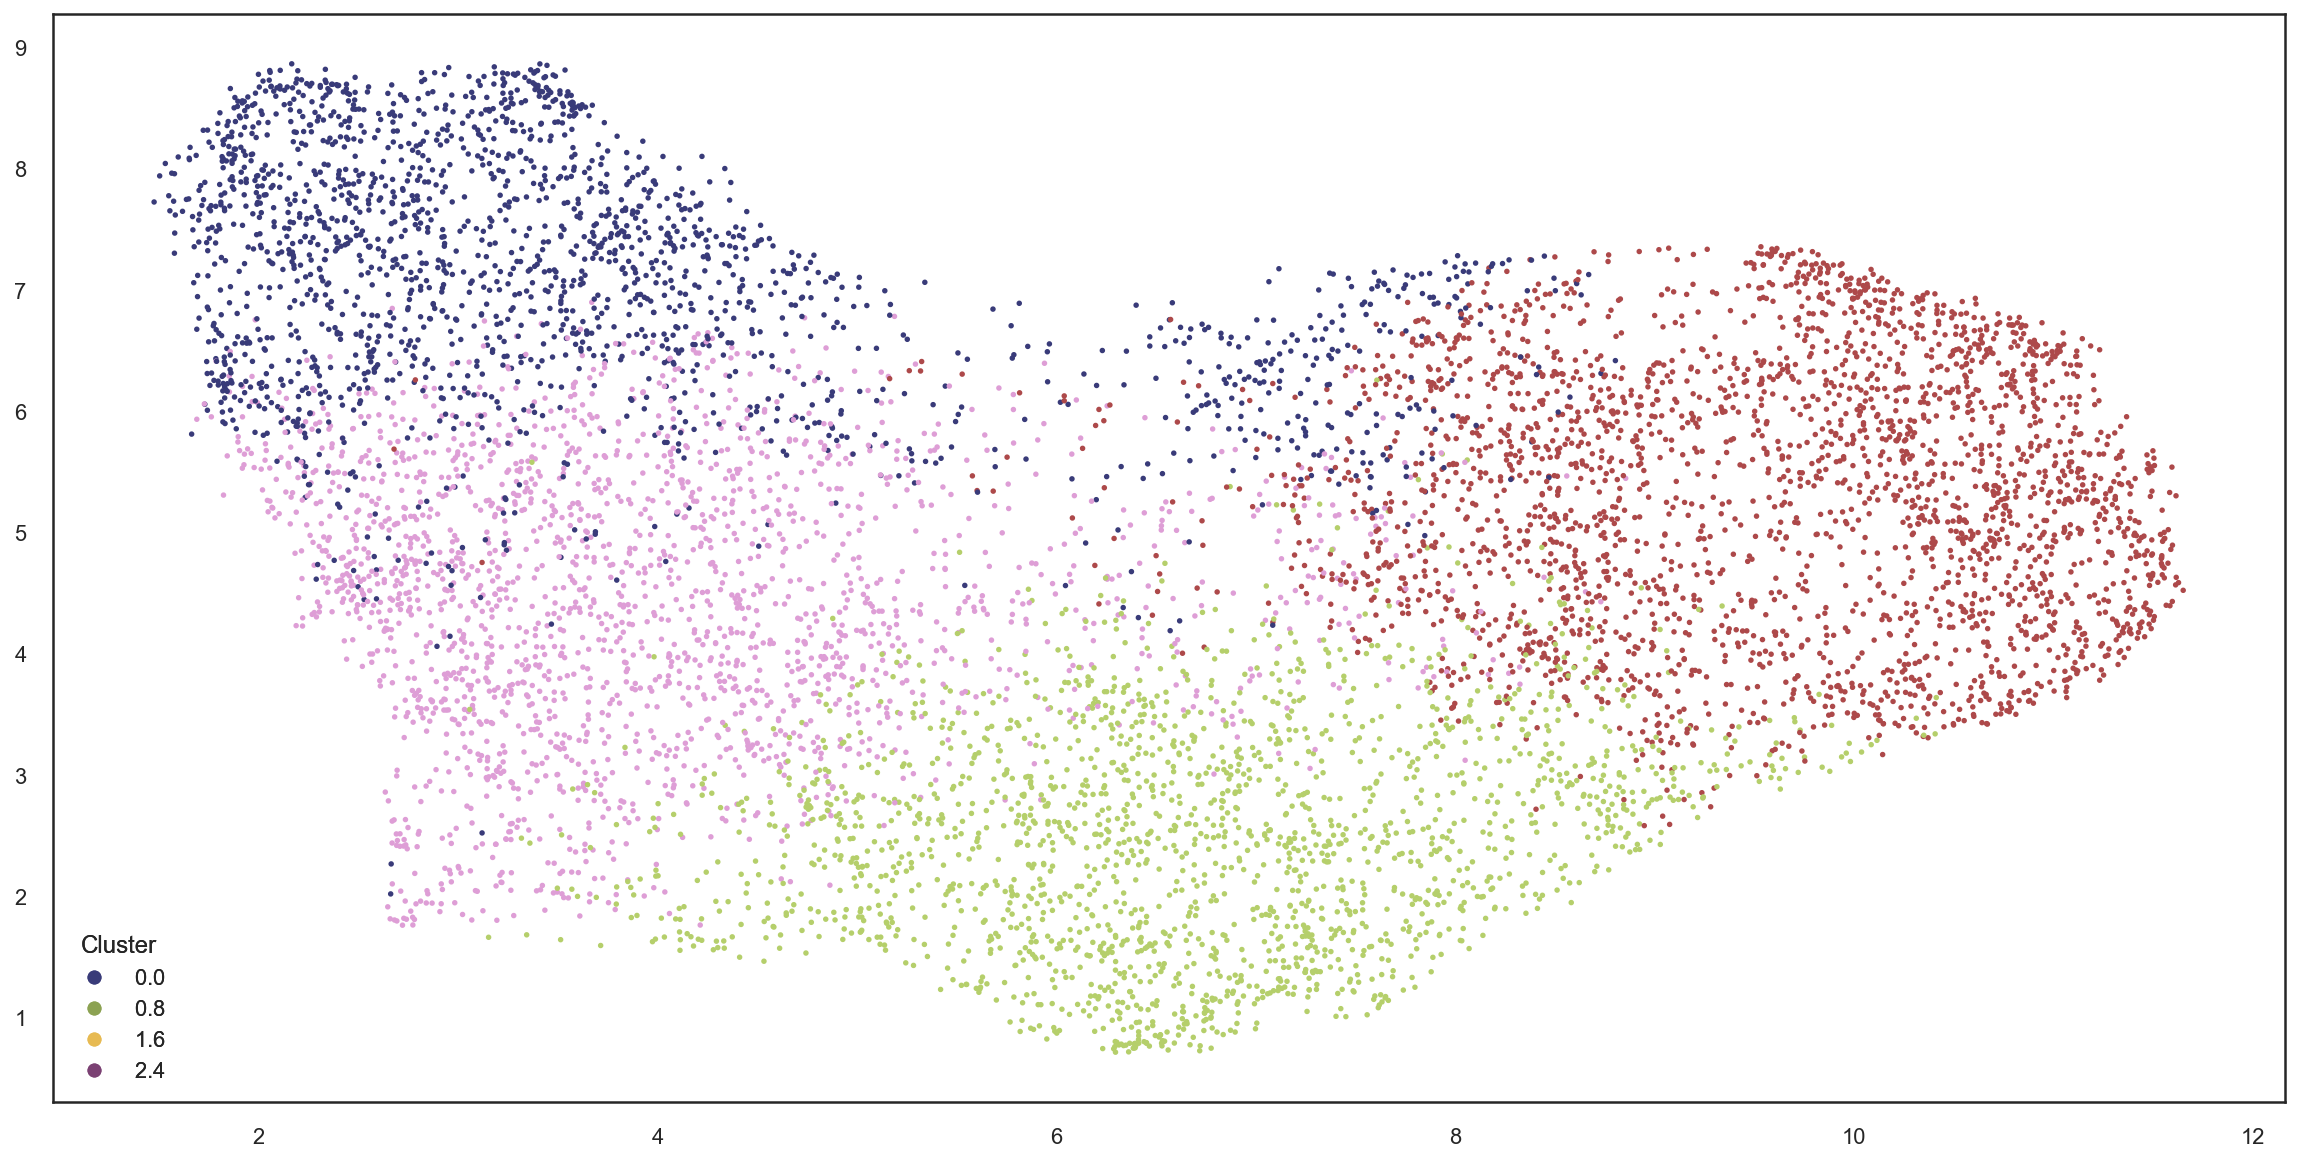

In [347]:
plot_cluster_umap(embedding_kproto,kproto_labels,3,'Cluster')

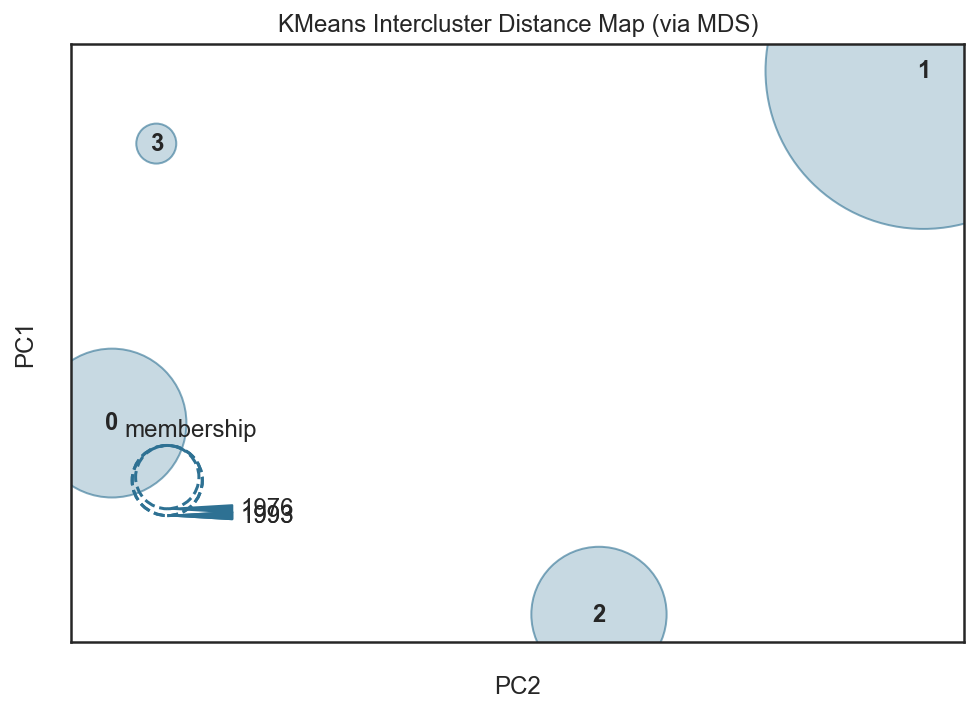

In [354]:
#Distantiate the clustering model and visualizer
view=InterclusterDistance(KMeans(4,random_state=4))
#Fit the data to the visualizer
view.fit(embedding_kproto)
#Render the figure
view.show()        
plt.show()

Since each cluster's center are perfectly separeted we conclude that our cluster quality is acceptable.

In [355]:
Kp_labeled_data = all_data.reset_index(drop=True)
Kp_labeled_data = pd.concat([Kp_labeled_data,pd.Series(kproto_labels, name='labels')], axis=1)
Kp_labeled_data

,Dayswus,Edu,Income,Recency,LTV,Perdeal,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebVisit,Mailfriend,Emailfriend,Children,Accessories,labels
0,1225.0,19.0,73546.0,77.0,-178.0,75.0,0.0,9.0,1.0,1.0,2.0,8.0,0,0,1,0,3
1,1188.0,14.0,68006.0,57.0,-168.0,76.0,6.0,25.0,4.0,4.0,43.0,7.0,0,0,1,0,3
2,1148.0,16.0,55099.0,51.0,-147.0,84.0,1.0,35.0,5.0,1.0,13.0,9.0,0,0,1,0,3
3,1248.0,16.0,50235.0,92.0,-138.0,93.0,9.0,42.0,1.0,5.0,10.0,7.0,0,0,1,0,3
4,1072.0,14.0,89745.0,76.0,-124.0,66.0,5.0,19.0,12.0,10.0,10.0,7.0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,797.0,16.0,101012.0,46.0,838.0,1.0,1.0,31.0,3.0,4.0,8.0,5.0,0,0,0,3,2
8996,995.0,19.0,114440.0,37.0,840.0,1.0,9.0,40.0,4.0,8.0,2.0,2.0,0,0,0,1,2
8997,1043.0,14.0,120079.0,33.0,841.0,1.0,3.0,50.0,1.0,9.0,3.0,3.0,0,0,0,2,2
8998,918.0,19.0,89181.0,41.0,841.0,1.0,0.0,23.0,0.0,3.0,3.0,4.0,0,0,0,0,1


### Evaluation by Classification using LGBM

In [525]:
#Set LGBM Dataframe
lgbm_data=all_data.copy()
for i in lgbm_data.select_dtypes(include='object'):
    lgbm_data[i]=lgbm_data[i].astype('category')

In [526]:
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, lgbm_data, kproto_labels, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.6341579939374642


In [527]:
clf_kp.fit(lgbm_data, kproto_labels)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(lgbm_data)

[LightGBM] [Warning] Unknown parameter: colsample_by_tree


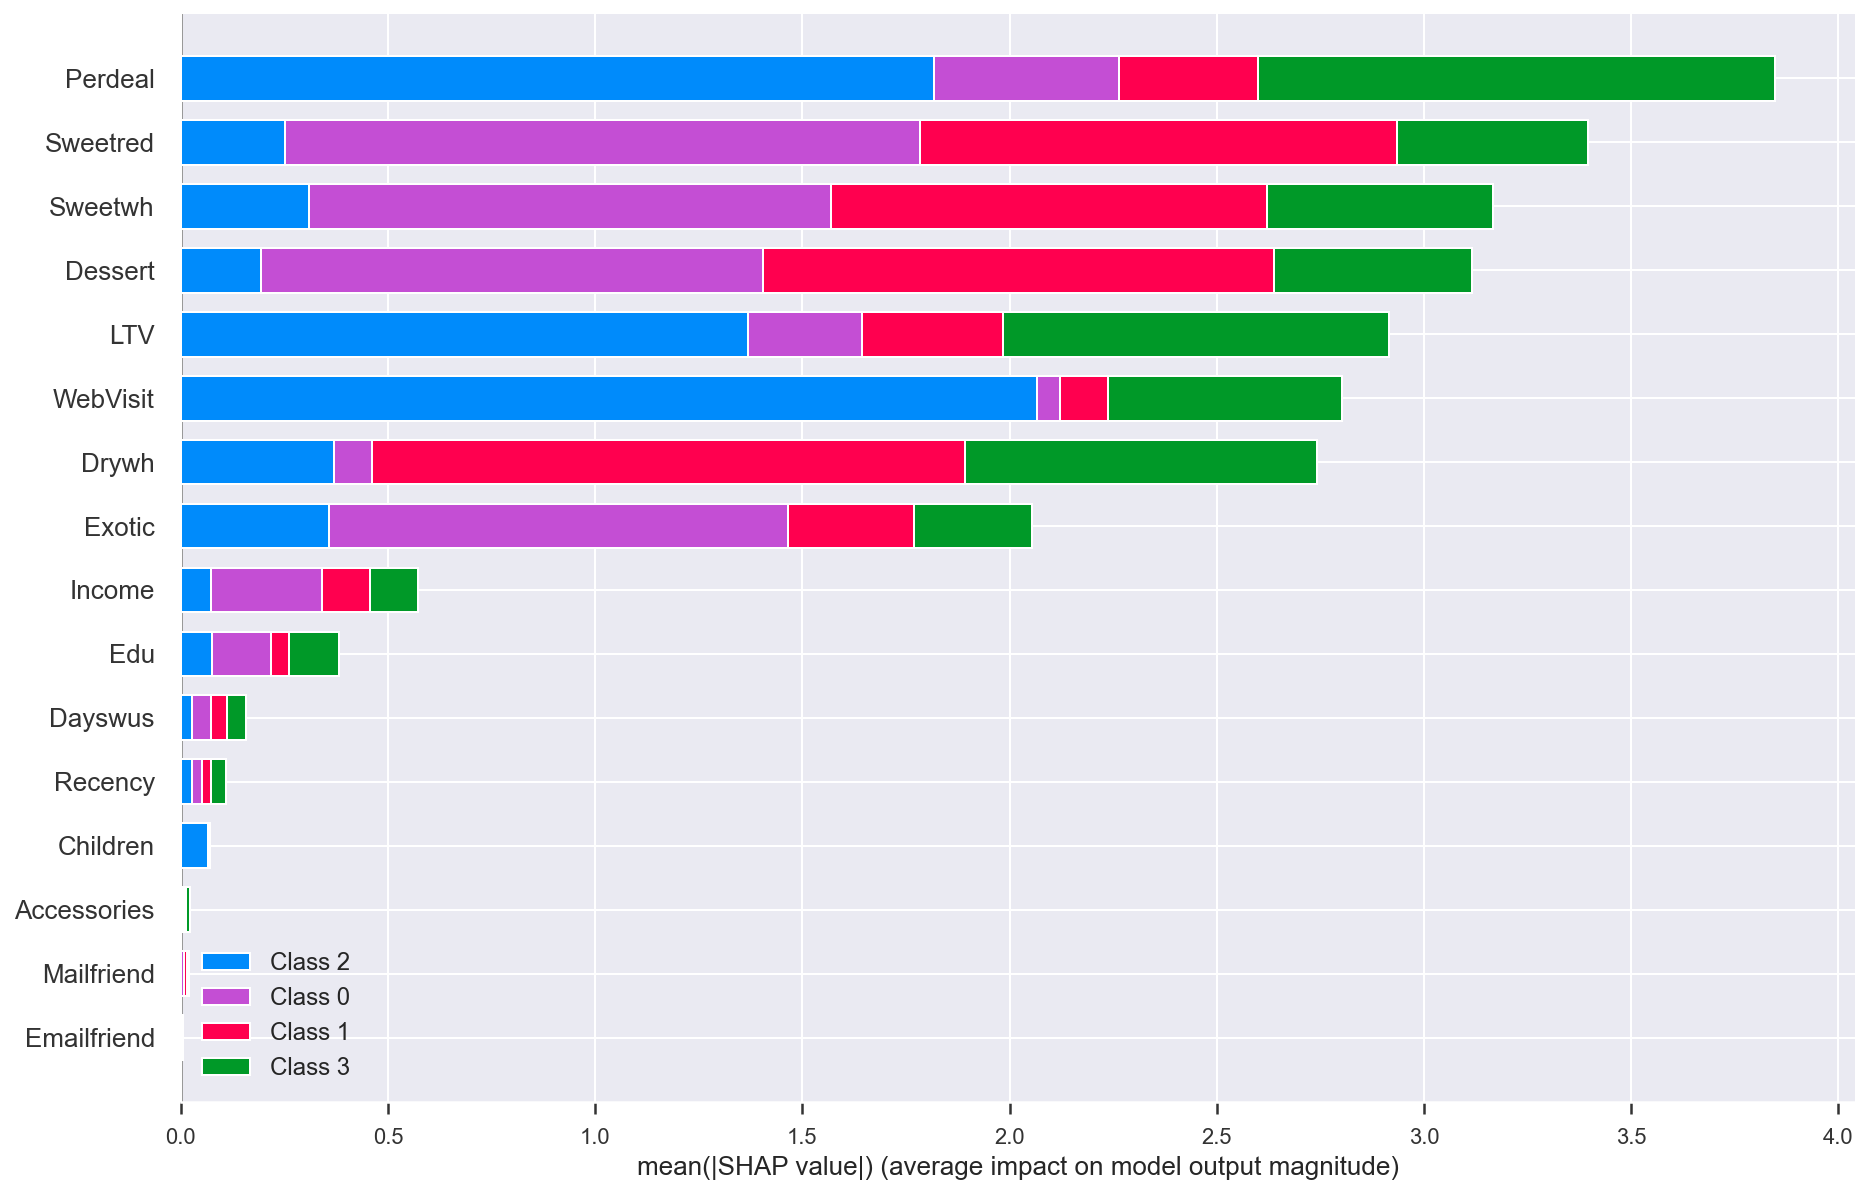

In [528]:
shap.summary_plot(shap_values_kp, lgbm_data, plot_type='bar', plot_size=(15, 10))

## Data Grouping

In [451]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [395]:
og_df.columns

Index(['Custid', 'Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome',
       'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred',
       'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit',
       'SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain',
       'Mailfriend', 'Emailfriend'],
      dtype='object')

In [490]:
df.columns

Index(['Custid', 'Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency',
       'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh',
       'Dessert', 'Exotic', 'WebPurchase', 'WebVisit', 'Mailfriend',
       'Emailfriend', 'Children', 'Accessories'],
      dtype='object')

### Demographics

In [552]:
# Selecting features related
dem_df = df.drop(index_iso).set_index('Custid')
dem_df = dem_df[['Dayswus', 'Age', 'Edu', 'Income','Children','LTV', 'Perdeal']].reset_index(drop=True)

In [553]:
# Adding the cluster labels 
dem_labeled_data = pd.concat([dem_df,pd.Series(kmeans_labels, name='labels')], axis=1)
dem_labeled_data

,Dayswus,Age,Edu,Income,Children,LTV,Perdeal,labels
0,1225.0,49.0,19.0,73546.0,1,-178.0,75.0,2
1,1188.0,43.0,14.0,68006.0,1,-168.0,76.0,2
2,1148.0,38.0,16.0,55099.0,1,-147.0,84.0,2
3,1248.0,38.0,16.0,50235.0,1,-138.0,93.0,2
4,1072.0,52.0,14.0,89745.0,1,-124.0,66.0,2
...,...,...,...,...,...,...,...,...
8995,797.0,70.0,16.0,101012.0,0,838.0,1.0,0
8996,995.0,72.0,19.0,114440.0,0,840.0,1.0,0
8997,1043.0,69.0,14.0,120079.0,0,841.0,1.0,0
8998,918.0,66.0,19.0,89181.0,0,841.0,1.0,3


In [547]:
# Characterizing the final clusters
dem_labeled_data.groupby('labels').mean().T

labels,0,1,2,3
Dayswus,-0.129627,0.024530,0.105528,0.038926
Age,1.054340,-1.158457,-0.585955,0.234322
Edu,0.000337,-0.960036,0.220831,0.611620
Income,1.031884,-1.108957,-0.587602,0.223328
Children,0.394802,0.813120,0.960633,0.916583
LTV,1.003961,-0.580286,-0.805720,0.038627
Perdeal,-1.105996,0.732510,0.819607,-0.047664


In [504]:
for i in dem_labeled_data.select_dtypes(include='float').columns.tolist():
    dem_labeled_data[i] = PowerTransformer(method='yeo-johnson').fit_transform(np.array(dem_labeled_data[i]).reshape(-1, 1))

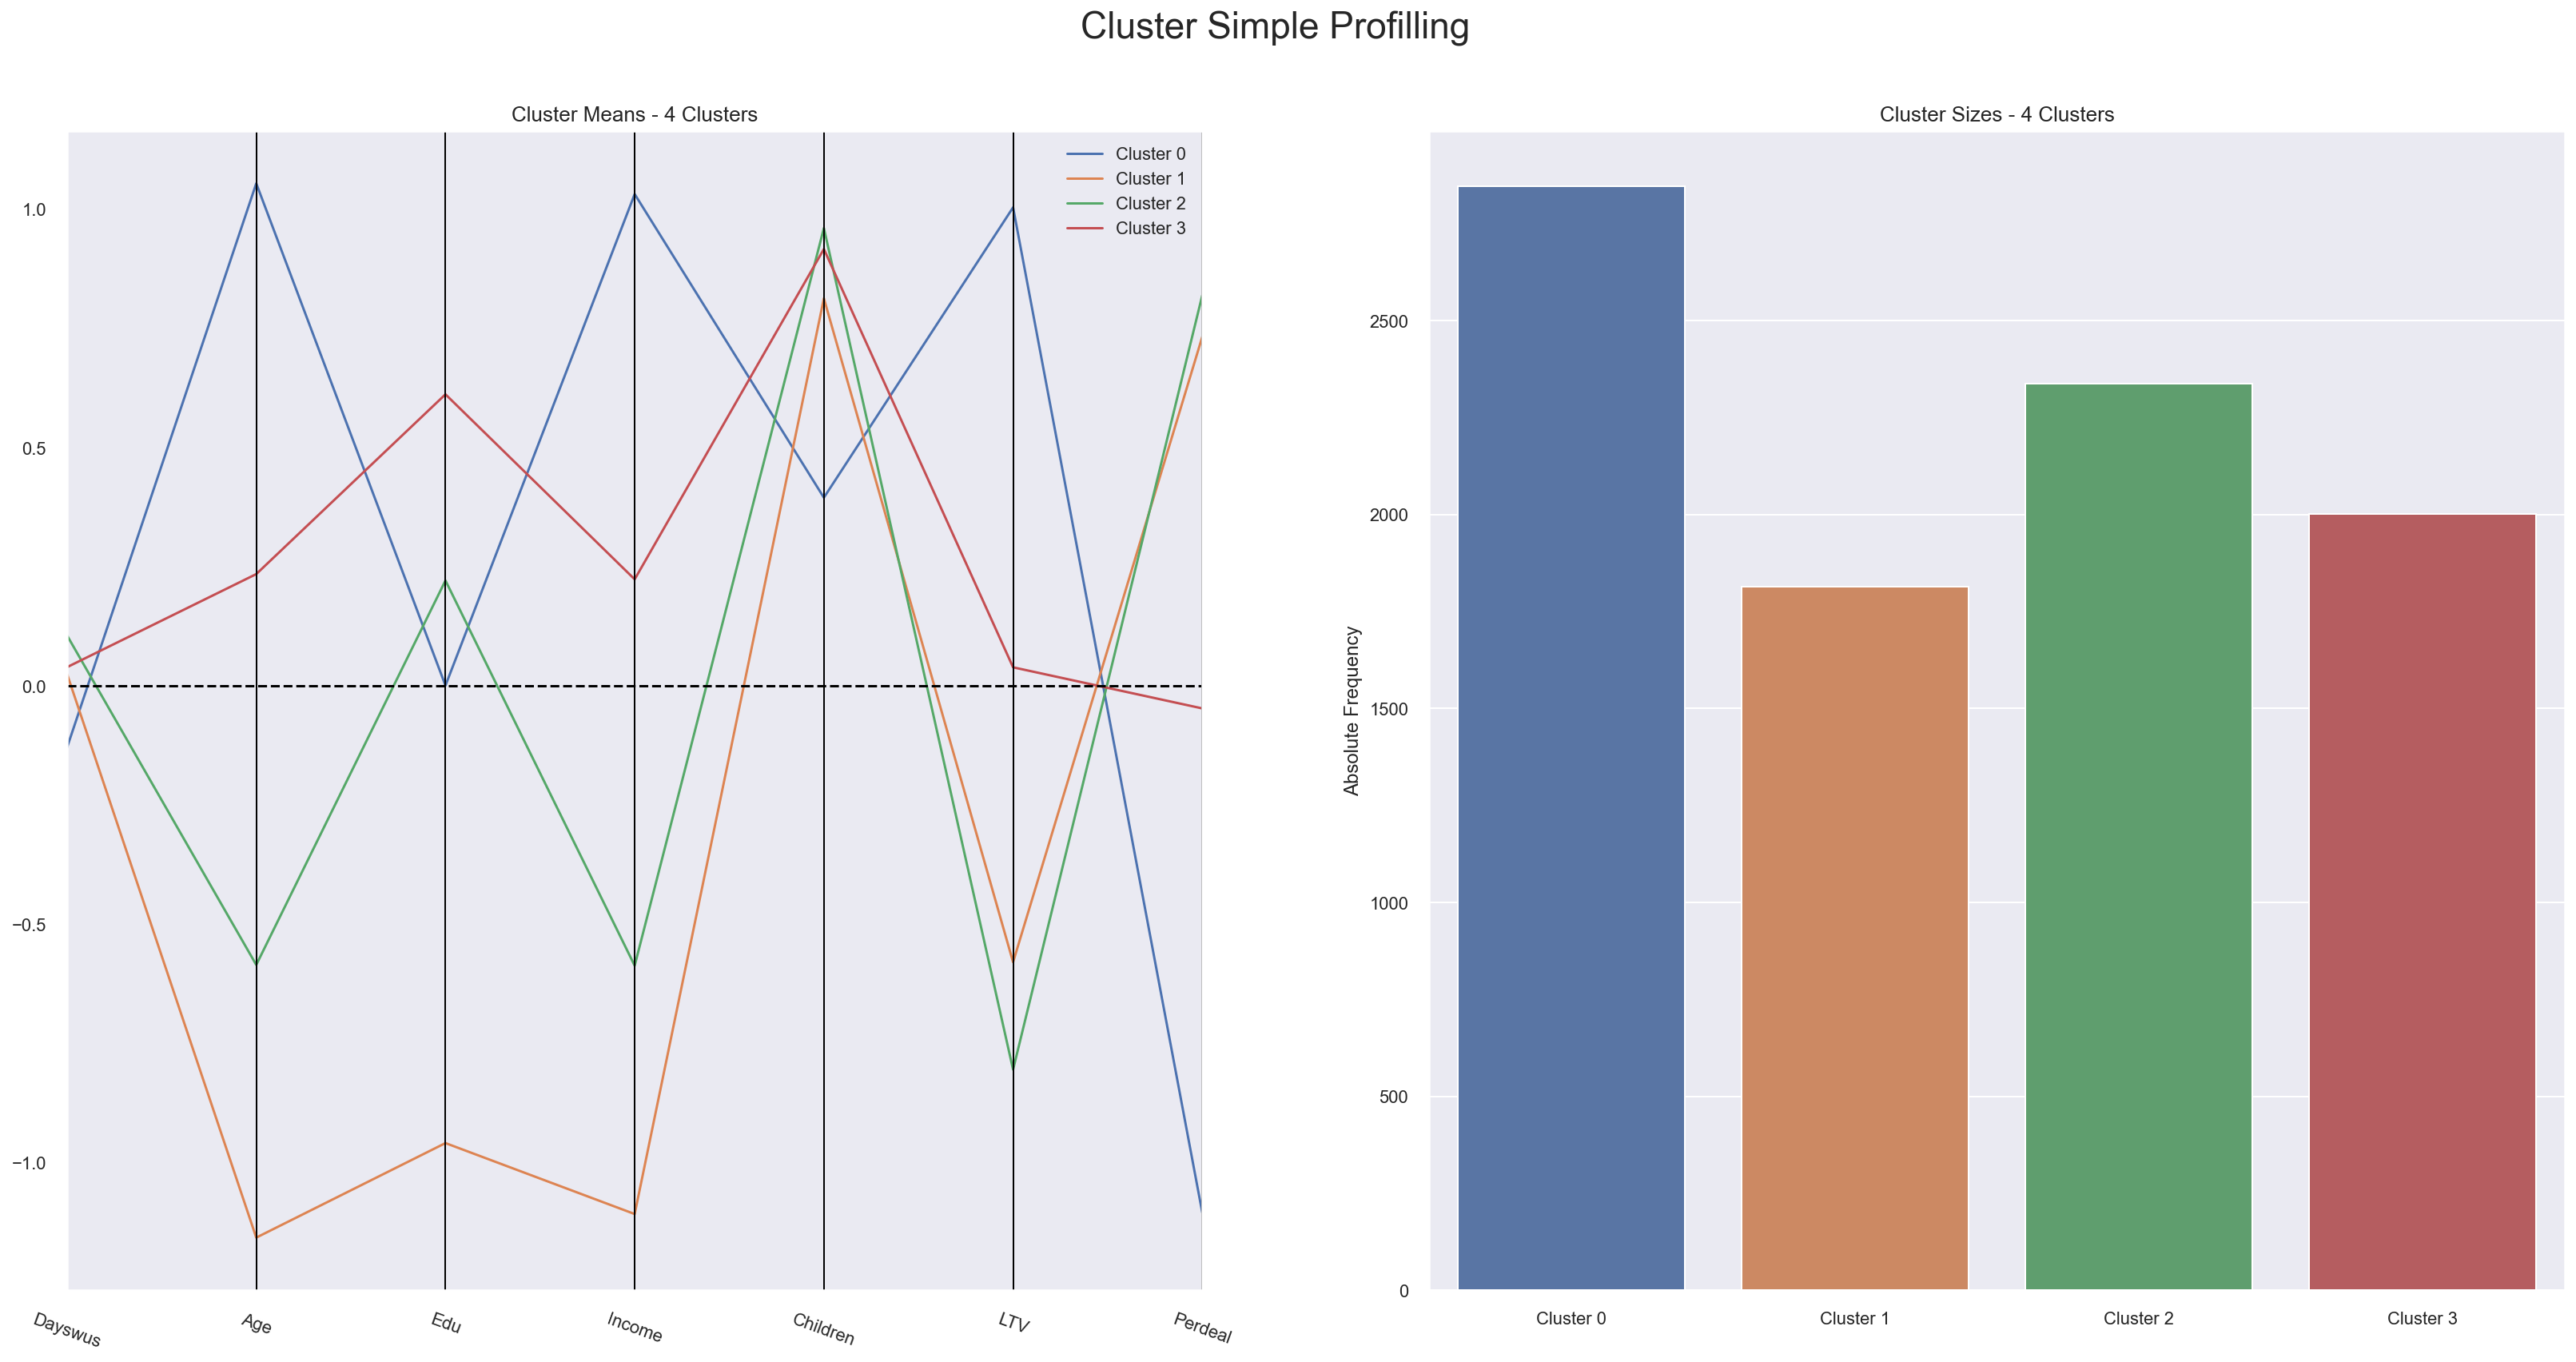

In [507]:
cluster_profiles(dem_labeled_data,
                 label_columns=['labels'],
                figsize = (28, 13),
                )

### Assessories

In [591]:
# Selecting features related
access_df = og_df.drop(index_iso).set_index('Custid')
access_df = access_df[['Access','SMRack', 'LGRack', 'Humid', 'Spcork', 'Bucket']].reset_index(drop=True)

In [592]:
# Adding the cluster labels 
access_labeled_data = pd.concat([access_df,pd.Series(kmeans_labels, name='labels')], axis=1)
access_labeled_data

,Access,SMRack,LGRack,Humid,Spcork,Bucket,labels
0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,2
2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,2
4,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...
8995,2,1,0,1,1,0,0
8996,0,0,0,0,1,0,0
8997,1,0,0,1,1,0,0
8998,0,0,0,0,0,0,3


In [593]:
# Characterizing the final clusters
access_labeled_data.groupby('labels').mean().T

labels,0,1,2,3
Access,0.282754,0.334620,0.108258,0.329171
SMRack,0.054795,0.300992,0.099273,0.089910
LGRack,0.077977,0.029217,0.008130,0.166833
Humid,0.140499,0.000551,0.000000,0.037463
Spcork,0.123639,0.011025,0.006846,0.046454
Bucket,0.009484,0.003859,0.000856,0.034965


In [594]:
data = access_labeled_data.groupby('labels').mean()
data

,Access,SMRack,LGRack,Humid,Spcork,Bucket
labels,,,,,,
0,0.282754,0.054795,0.077977,0.140499,0.123639,0.009484
1,0.334620,0.300992,0.029217,0.000551,0.011025,0.003859
2,0.108258,0.099273,0.008130,0.000000,0.006846,0.000856
3,0.329171,0.089910,0.166833,0.037463,0.046454,0.034965


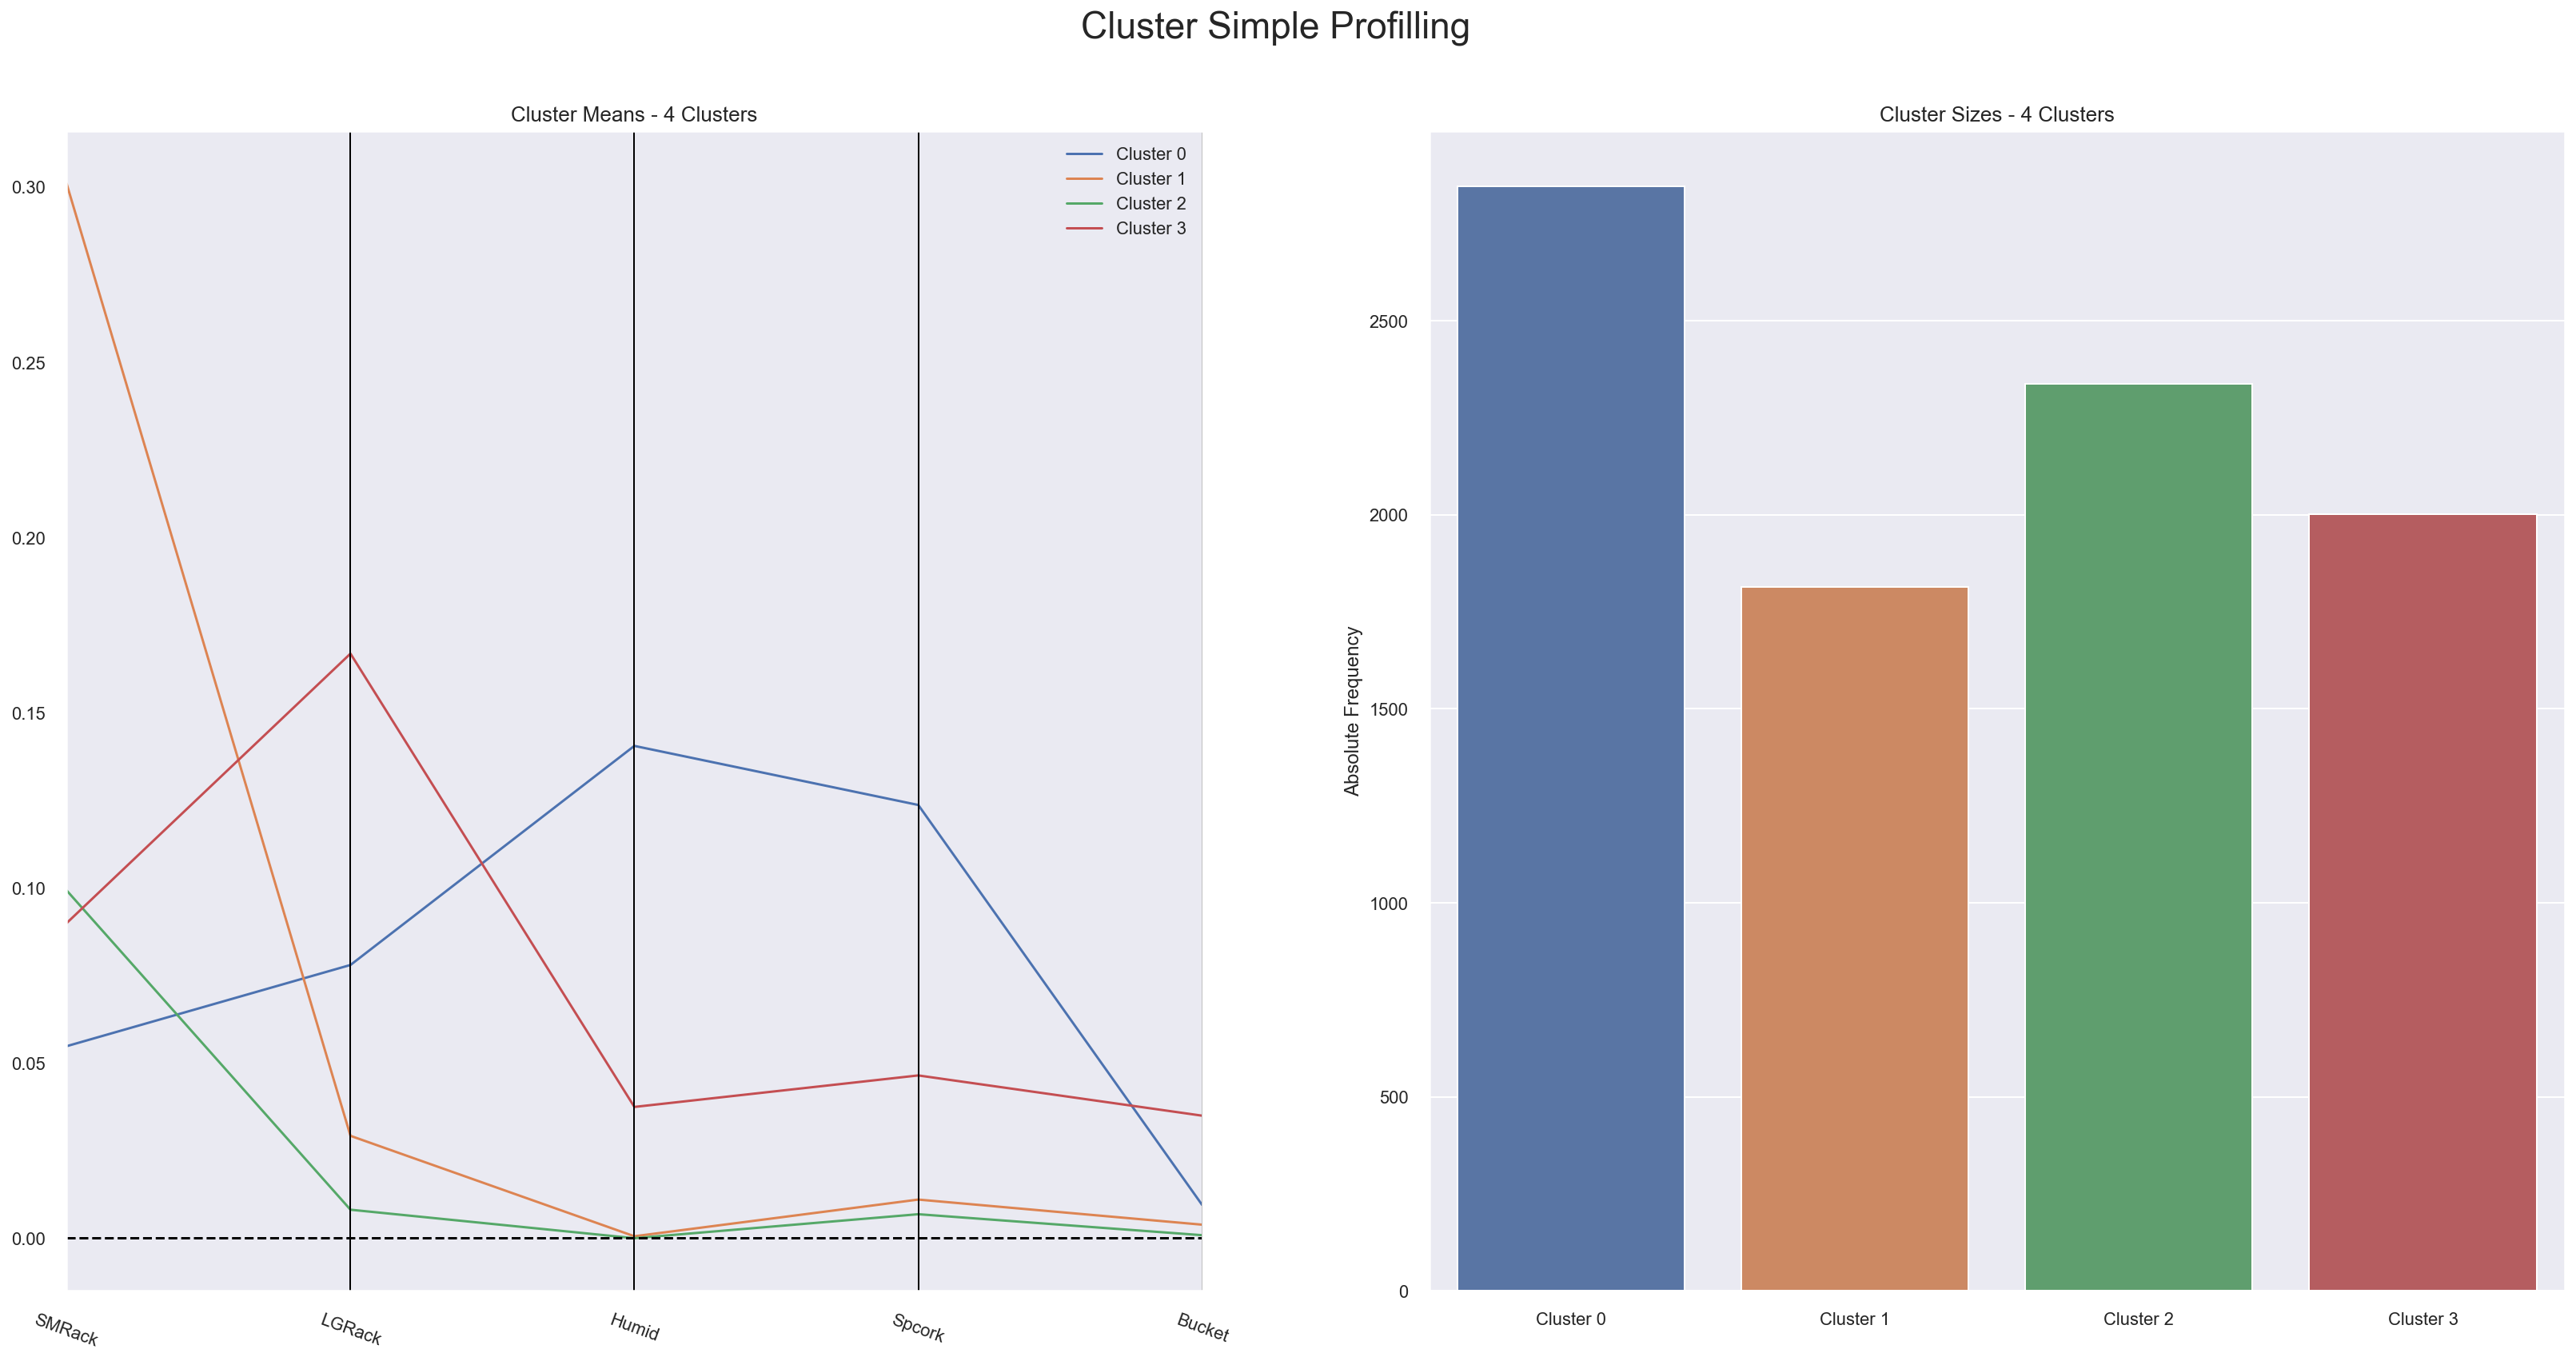

In [488]:
cluster_profiles(access_labeled_data,
                 label_columns=['labels'],
                figsize = (28, 13),
                )

### Wine Types

In [390]:
# Selecting features related
wine_df = df.drop(index_iso).set_index('Custid')
wine_df = wine_df[['Dryred', 'Sweetred', 'Drywh', 'Sweetwh','Dessert', 'Exotic']].reset_index(drop=True)

In [391]:
# Adding the cluster labels 
wine_labeled_data = pd.concat([wine_df,pd.Series(kmeans_labels, name='labels')], axis=1)
wine_labeled_data

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,labels
0,89.0,0.0,9.0,1.0,1.0,2.0,2
1,61.0,6.0,25.0,4.0,4.0,43.0,2
2,58.0,1.0,35.0,5.0,1.0,13.0,2
3,43.0,9.0,42.0,1.0,5.0,10.0,2
4,54.0,5.0,19.0,12.0,10.0,10.0,2
...,...,...,...,...,...,...,...
8995,61.0,1.0,31.0,3.0,4.0,8.0,0
8996,39.0,9.0,40.0,4.0,8.0,2.0,0
8997,37.0,3.0,50.0,1.0,9.0,3.0,0
8998,73.0,0.0,23.0,0.0,3.0,3.0,3


In [582]:
# Characterizing the final clusters
wine_labeled_data.groupby('labels').mean()

,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic
labels,,,,,,
0,45.419038,7.576396,32.262381,7.525465,7.216719,9.009484
1,23.439434,15.629240,29.518393,15.839895,15.574131,35.505550
2,53.641421,4.520325,32.771502,4.488233,4.577236,18.485237
3,81.010989,1.379121,14.720280,1.378122,1.389111,9.524975


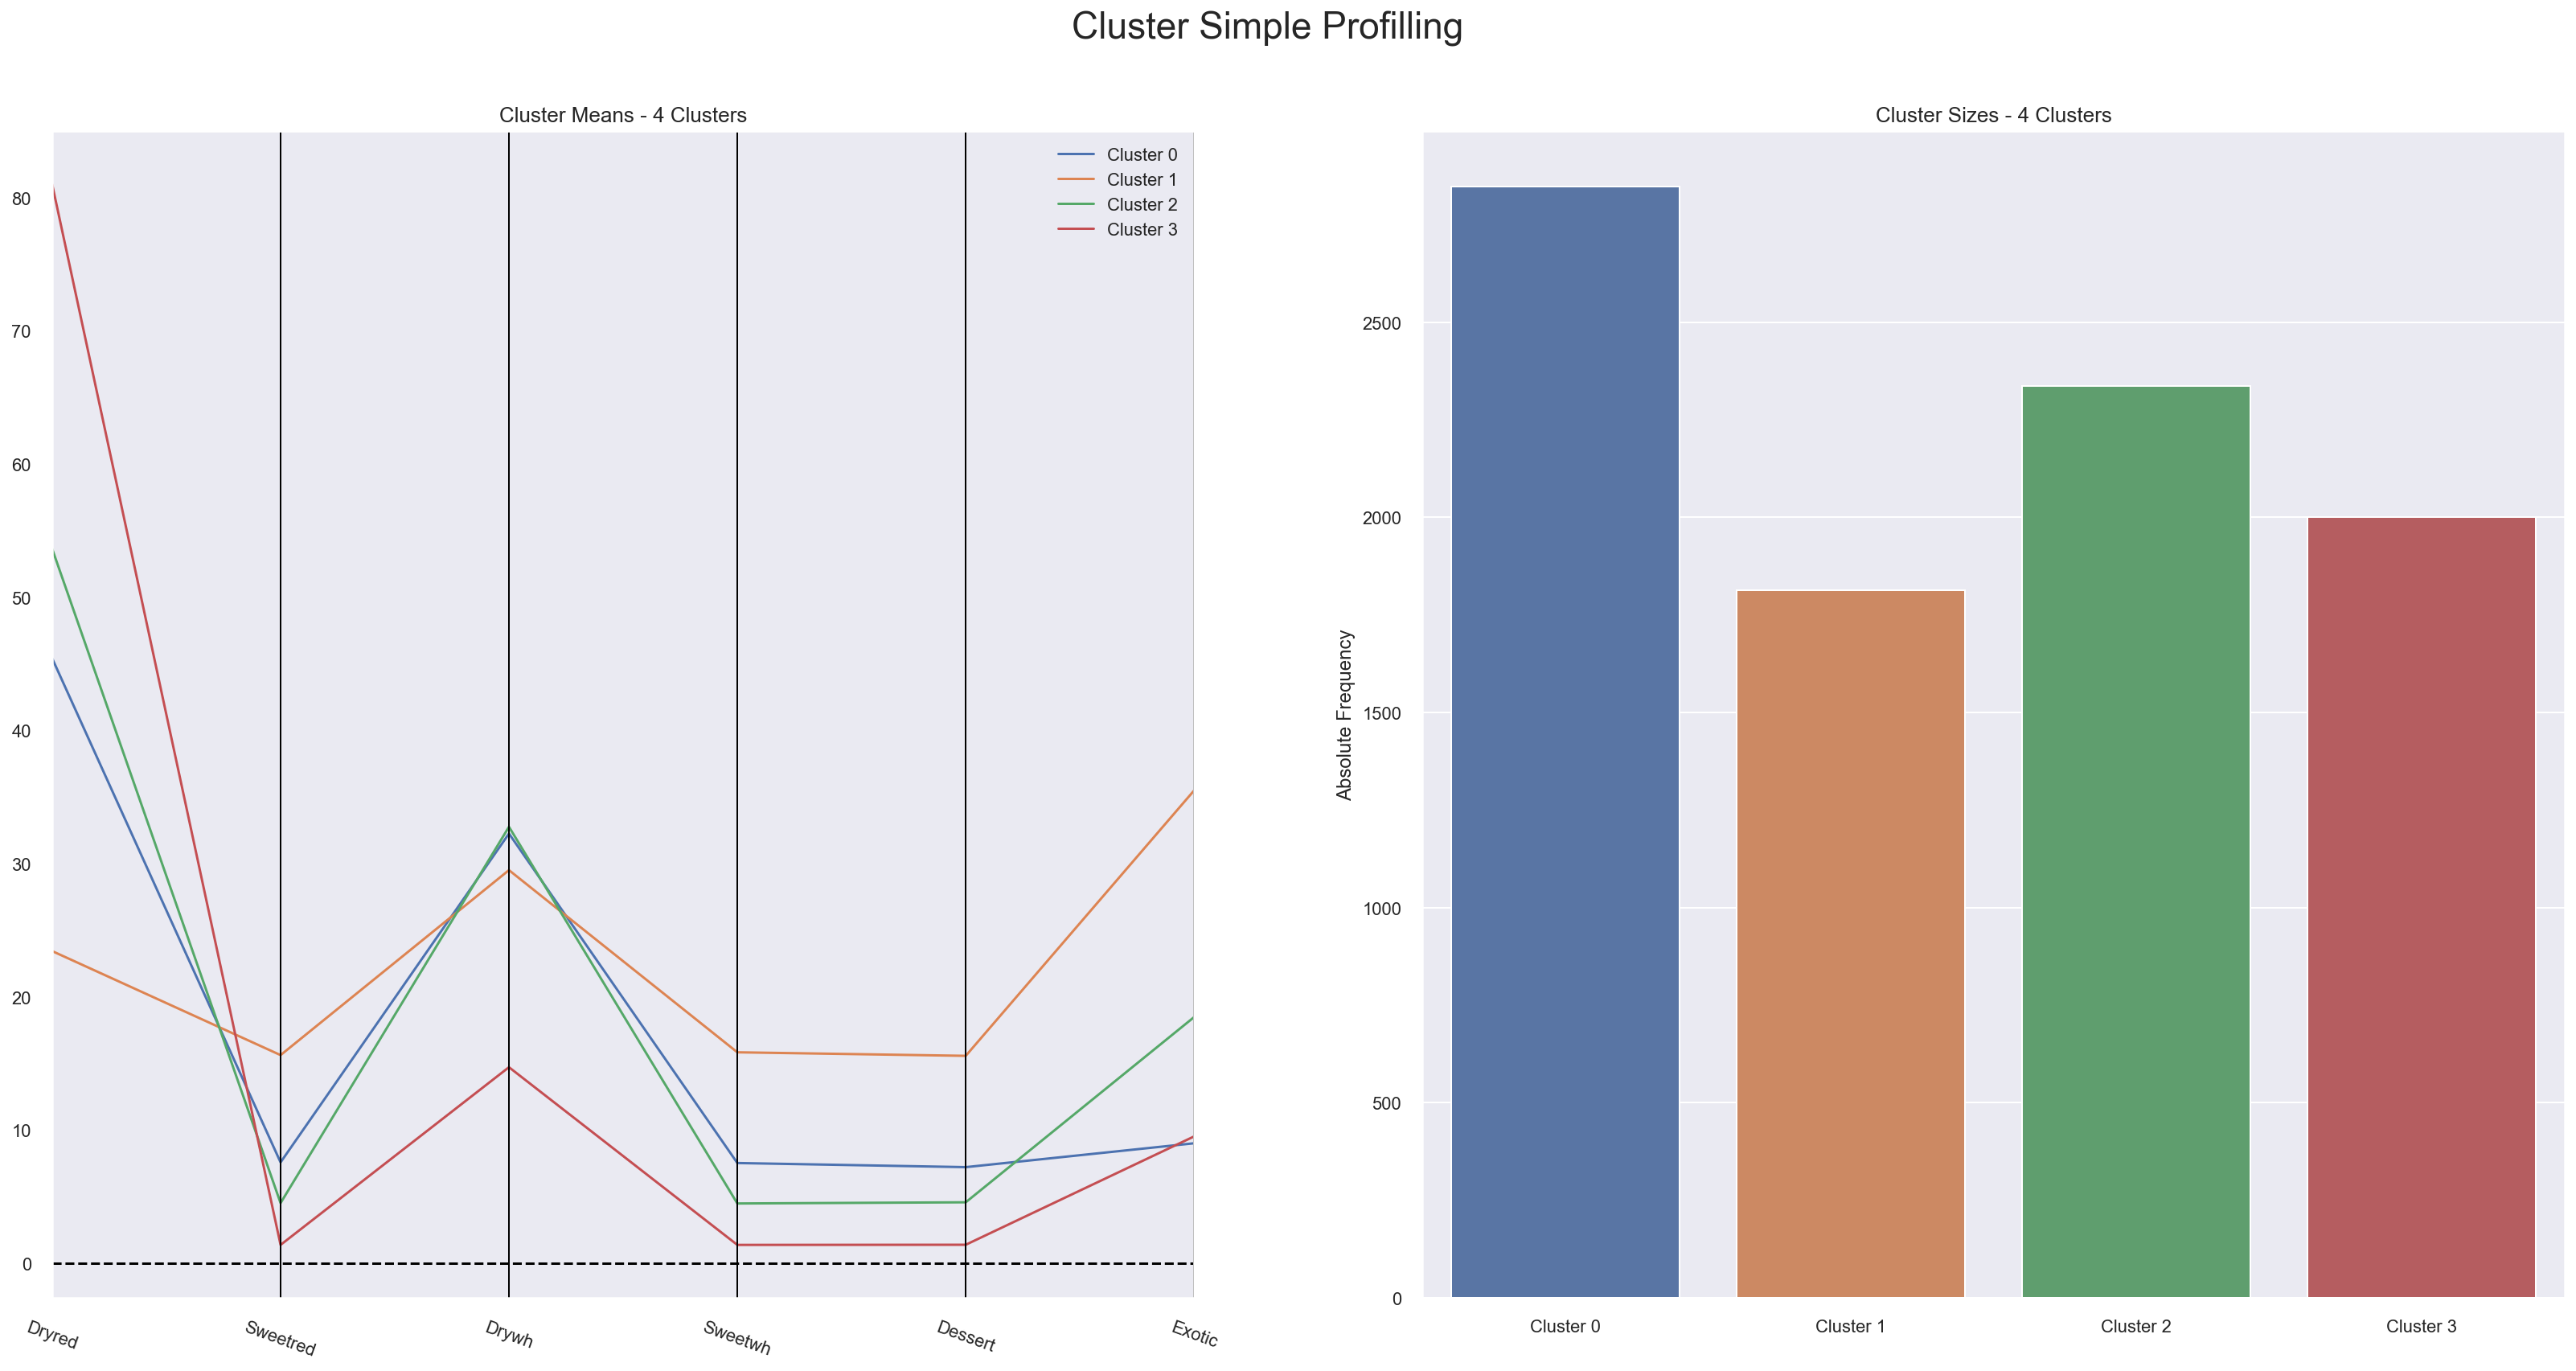

In [459]:
cluster_profiles(wine_labeled_data,
                 label_columns=['labels'],
                figsize = (28, 13),
                )

### Channel of Comunication

In [584]:
# Selecting features related
chan_df = og_df.drop(index_iso).set_index('Custid')
chan_df = chan_df[['WebPurchase', 'WebVisit','Mailfriend', 'Emailfriend']].reset_index(drop=True)

In [585]:
# Adding the cluster labels 
chan_labeled_data = pd.concat([chan_df,pd.Series(kmeans_labels, name='labels')], axis=1)
chan_labeled_data

,WebPurchase,WebVisit,Mailfriend,Emailfriend,labels
0,57.0,8.0,0,0,2
1,42.0,7.0,0,0,2
2,67.0,9.0,0,0,2
3,44.0,7.0,0,0,2
4,40.0,7.0,0,0,2
...,...,...,...,...,...
8995,21.0,5.0,0,0,0
8996,11.0,2.0,0,0,0
8997,15.0,3.0,0,0,0
8998,17.0,4.0,0,0,3


In [586]:
# Characterizing the final clusters
chan_labeled_data.groupby('labels').mean()

,WebPurchase,WebVisit,Mailfriend,Emailfriend
labels,,,,
0,24.257464,2.978574,0.053038,0.002107
1,55.053682,6.493117,0.529217,0.362734
2,54.525460,6.651262,0.130509,0.080873
3,47.752248,6.065934,0.078422,0.028472


In [508]:
for i in chan_labeled_data.select_dtypes(include='float').columns.tolist():
    chan_labeled_data[i] = PowerTransformer(method='yeo-johnson').fit_transform(np.array(chan_labeled_data[i]).reshape(-1, 1))

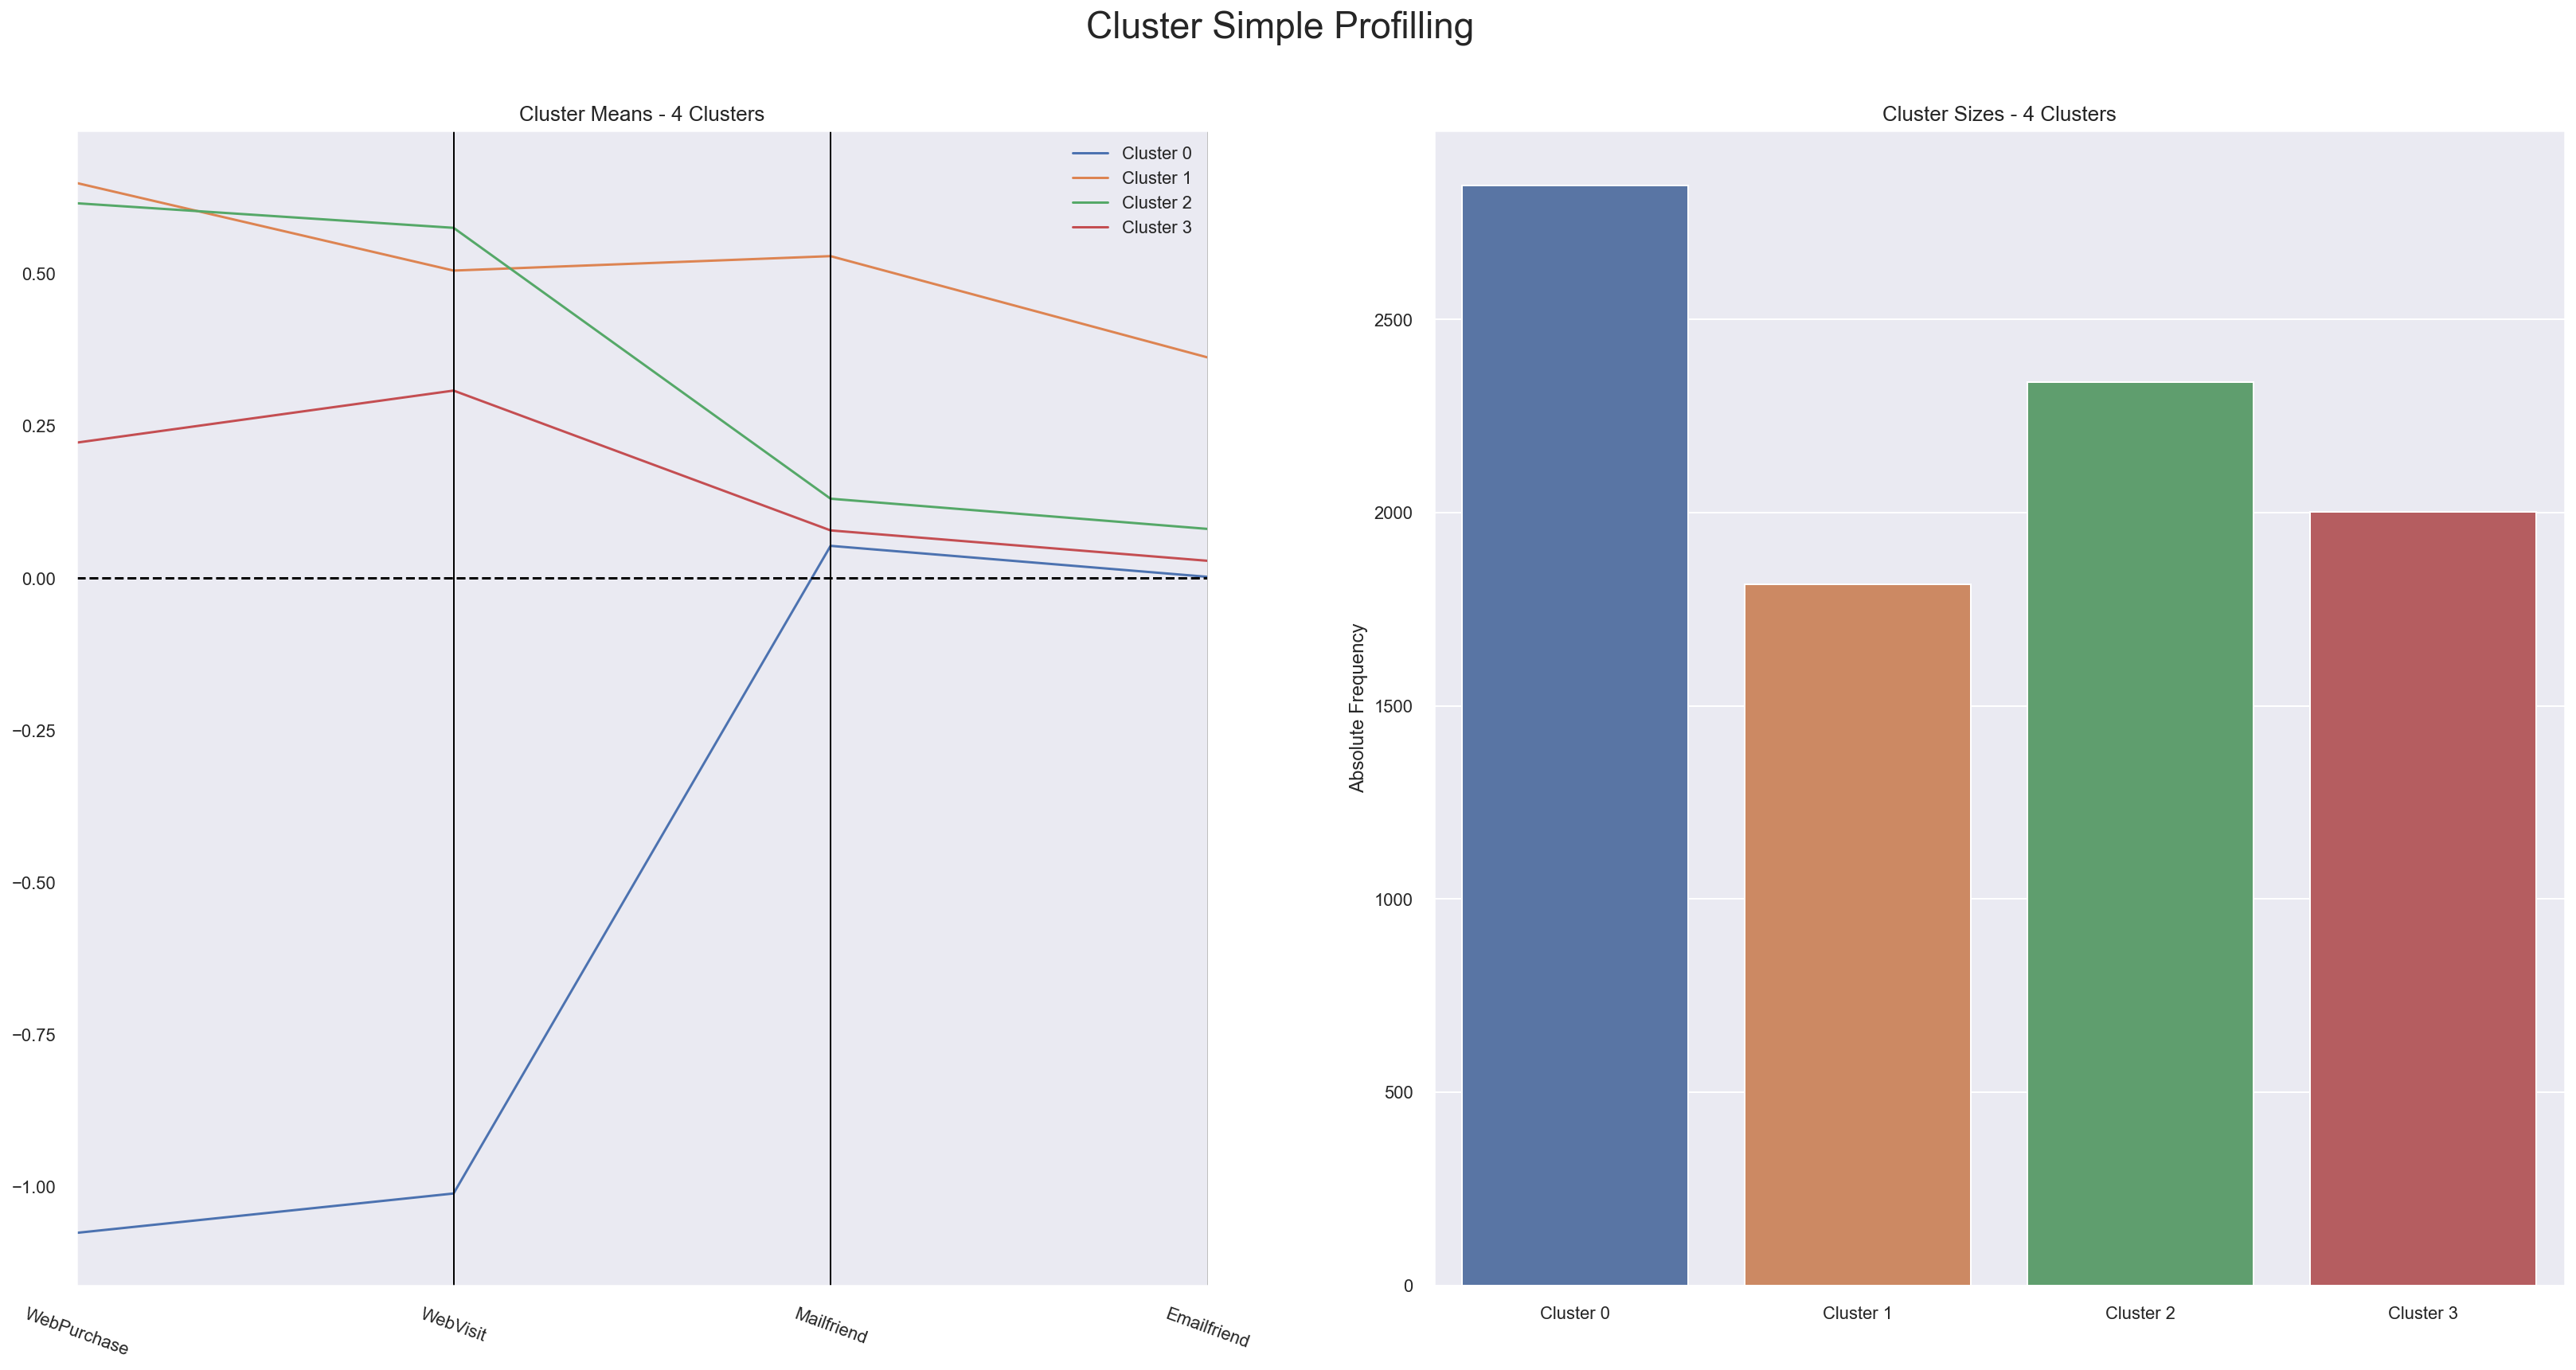

In [509]:
cluster_profiles(chan_labeled_data,
                 label_columns=['labels'],
                figsize = (28, 13),
                )

### RFM 

In [588]:
# Selecting features related
rfm_df = df.drop(index_iso).set_index('Custid')
rfm_df = rfm_df[['Recency', 'Freq', 'Monetary']].reset_index(drop=True)

In [589]:
# Adding the cluster labels 
rfm_labeled_data = pd.concat([rfm_df,pd.Series(kmeans_labels, name='labels')], axis=1)
rfm_labeled_data

,Recency,Freq,Monetary,labels
0,77.0,17.0,661.0,2
1,57.0,19.0,762.0,2
2,51.0,11.0,345.0,2
3,92.0,9.0,257.0,2
4,76.0,22.0,954.0,2
...,...,...,...,...
8995,46.0,43.0,2286.0,0
8996,37.0,38.0,1978.0,0
8997,33.0,42.0,2228.0,0
8998,41.0,34.0,1729.0,3


In [590]:
# Characterizing the final clusters
rfm_labeled_data.groupby('labels').mean()

,Recency,Freq,Monetary
labels,,,
0,49.858799,24.383210,1126.015806
1,50.934406,4.872346,117.238826
2,52.996577,6.361147,182.163457
3,49.715285,14.409590,567.457043


In [510]:
for i in rfm_labeled_data.select_dtypes(include='float').columns.tolist():
    rfm_labeled_data[i] = PowerTransformer(method='yeo-johnson').fit_transform(np.array(rfm_labeled_data[i]).reshape(-1, 1))

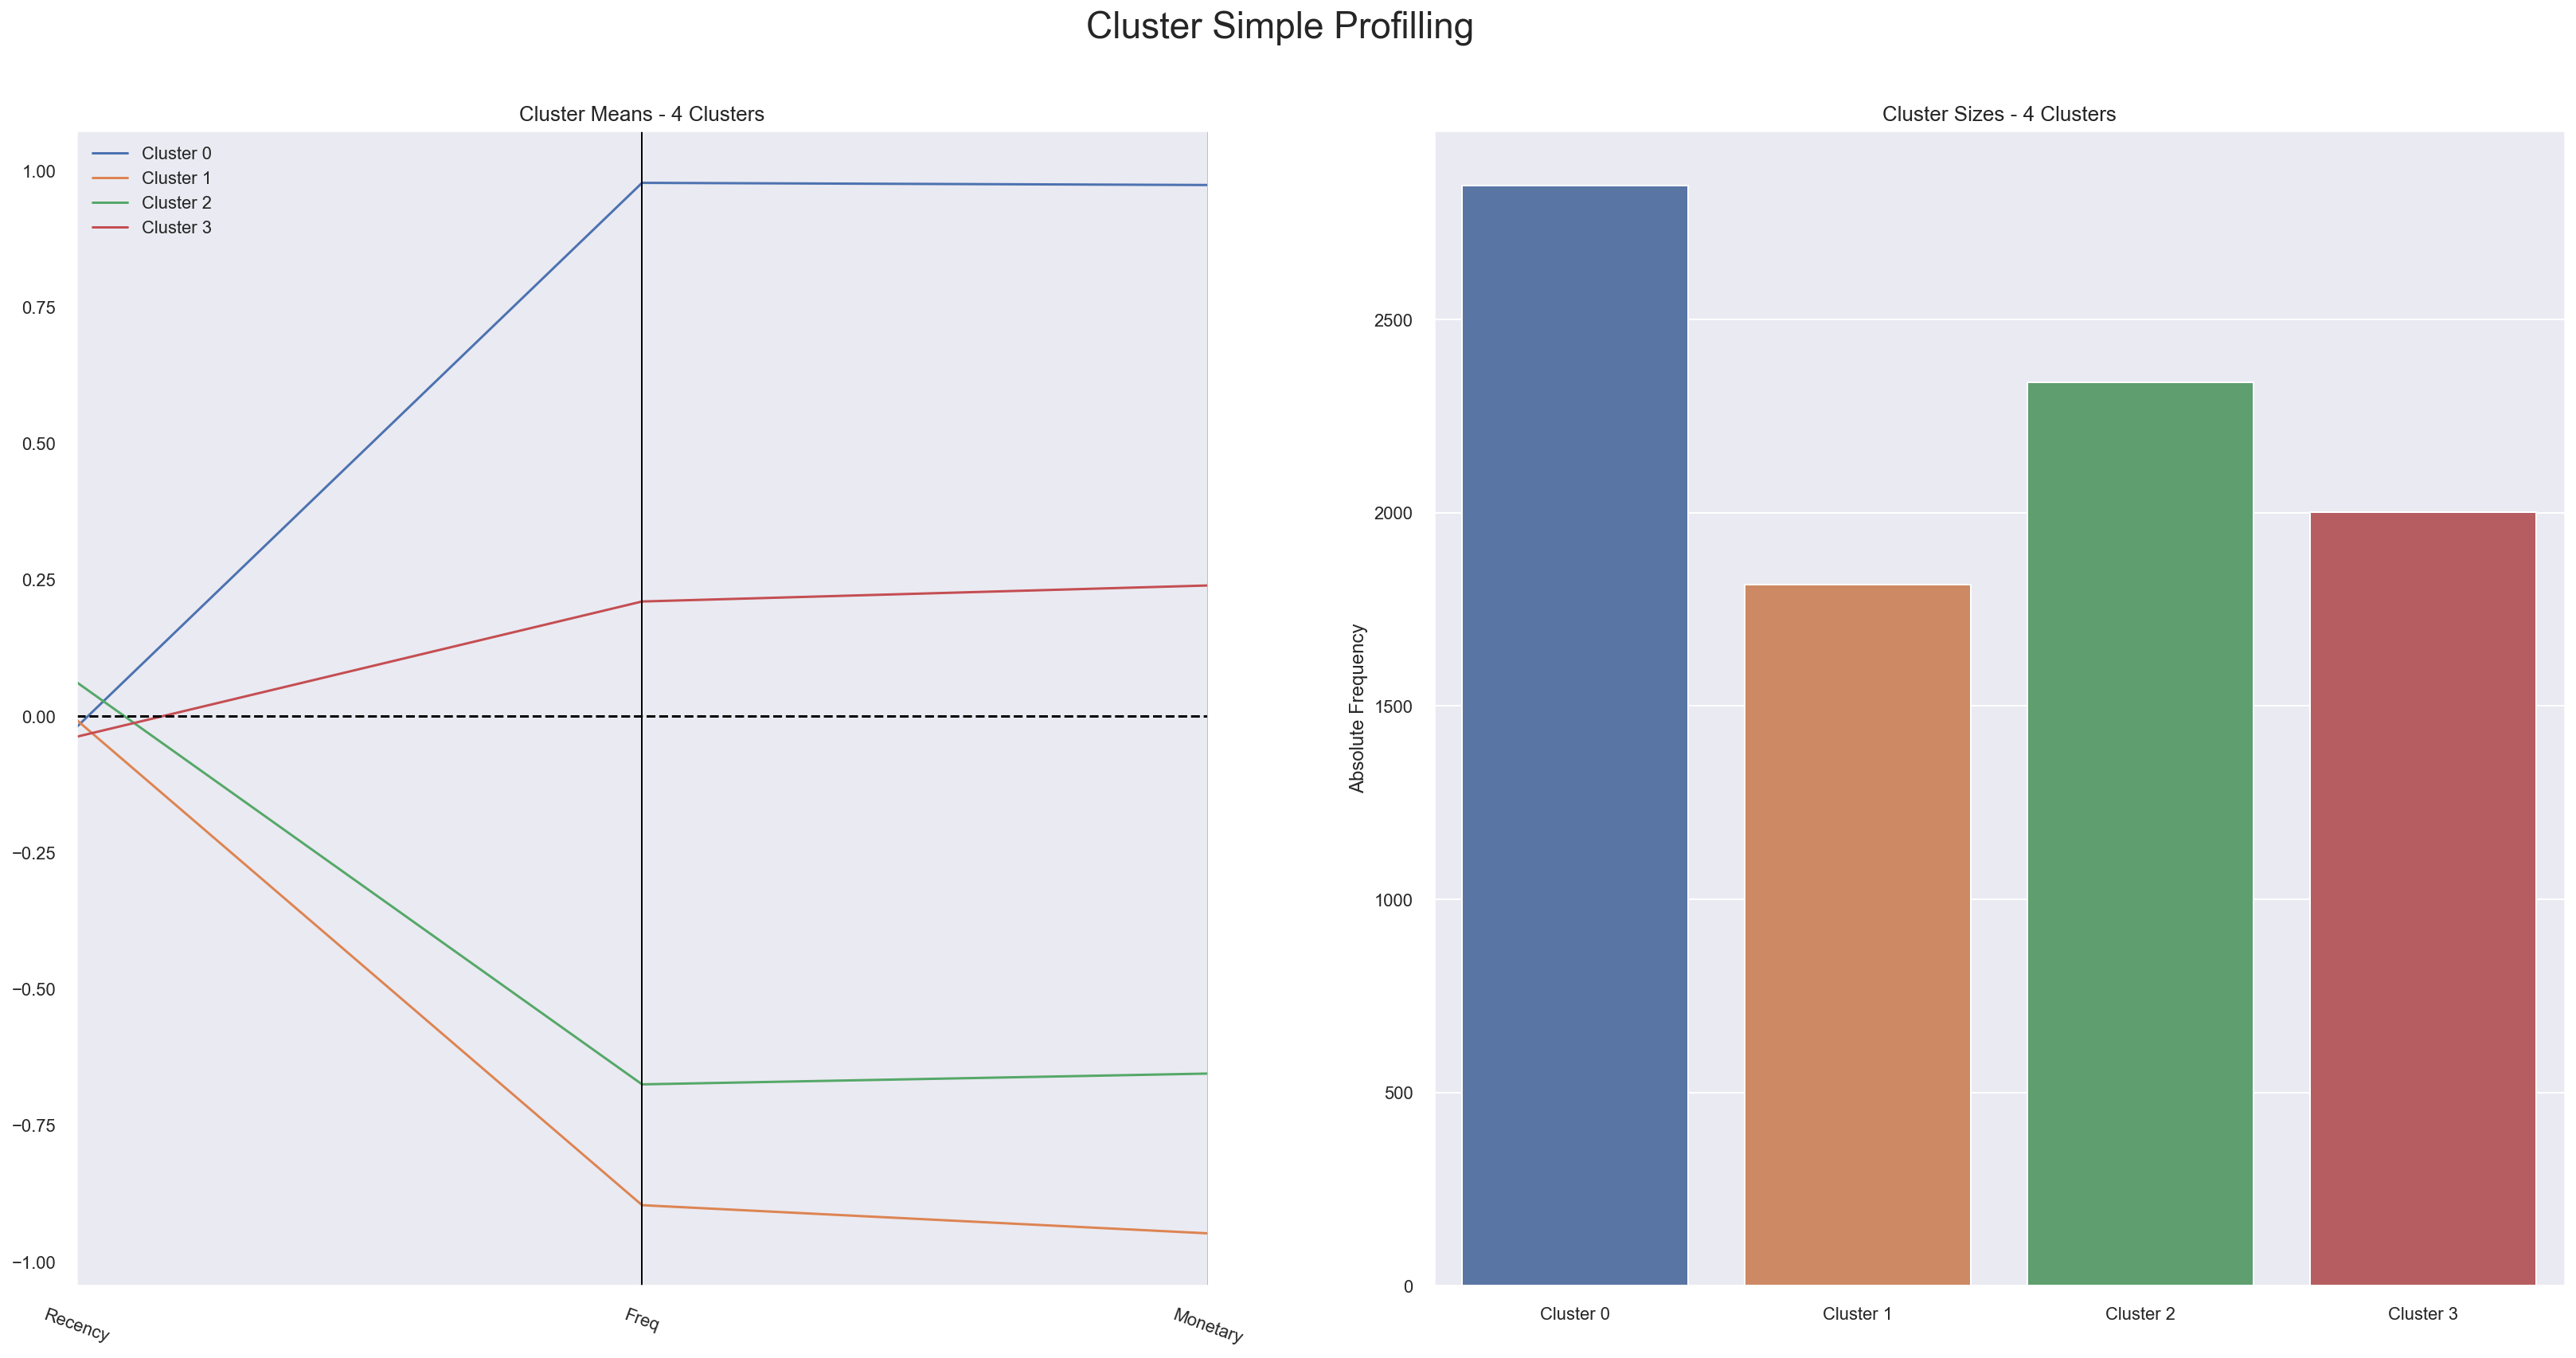

In [511]:
cluster_profiles(rfm_labeled_data,
                 label_columns=['labels'],
                figsize = (28, 13),
                )